# Graded Challenge 4

# Perkenalan

- Nama  =   Alsello Diveni Manuputty
- Batch =   HCK-006 Pondok Indah
- Phase =   1
----
# Objective
```
Pada notebook ini akan dilakukan pengerjaan Graded Challenge 4 dengan objective membuat model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank. Data nya merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir. Setelah sudah dimodel, selanjutnya akan ditentukan cluster-clusternya berdasarkan behavior nya masing-masing. 
```

# Query SQL

``````
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_006_hck.credit-card-information`
WHERE mod(CUST_ID, 2) = 0
``````

# Import Library

In [1]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from random import sample
from numpy.random import uniform
from feature_engine.outliers import Winsorizer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

import warnings
warnings.filterwarnings(action='ignore')

# Data Loading

In [2]:
mentah = pd.read_csv('h8dsft_P1G4_AlselloDM.csv')

In [3]:
# menampilkan 10 data pertama
mentah.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535           0.125000      200.0               0.0   
1     1902   943.584041           0.875000      103.0             103.0   
2     2322     1.979916           0.125000       80.0              80.0   
3     3426   461.455720           1.000000      585.0             585.0   
4     3976  1053.594730           1.000000     1450.0            1450.0   
5     4266  2237.238086           1.000000      120.0             120.0   
6     4360  2730.843802           1.000000     2900.0            2900.0   
7     4680   424.994385           0.375000     1200.0            1200.0   
8     5884    18.885677           0.375000       57.0              57.0   
9       24     0.004816           0.545455       51.7               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
6                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   
8                     0.0           0.0                0.125   
9                    51.7           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   
5                       0.125                             0.000   
6                       0.125                             0.000   
7                       0.125                             0.000   
8                       0.125                             0.000   
9                       0.000                             0.250   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
6                     0.0                 0              1        2900.0   
7                     0.0                 0              1        1200.0   
8                     0.0                 0              1        1500.0   
9                     0.0                 0              3        3000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8  
5  343.102984        712.986387               0.0       8  
6    0.000000               NaN               0.0       8  
7   57.266292         56.720210               0.0       8  
8    0.000000               NaN               0.0       8  
9   33.249088          0.059481               0.0      12

In [4]:
# menampilkan 10 data terakhir
mentah.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     1588   538.768762           0.909091     226.95            129.58   
4466     6900  7468.012010           1.000000    1569.41            796.07   
4467     2528   427.642111           0.888889       0.00              0.00   
4468     1226   706.327578           0.888889     169.54            169.54   
4469     2152  1420.727073           1.000000       0.00              0.00   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                   97.37    452.009130             0.545455   
4466                  773.34   4500.288676             0.545455   
4467                    0.00   2563.705644             0.000000   
4468                    0.00   1406.735573             0.333333   
4469                    0.00    311.804499             0.000000   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.090909                          0.454545   
4466                    0.454545                          0.363636   
4467                    0.000000                          0.000000   
4468                    0.333333                          0.000000   
4469                    0.000000                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 8              9        1200.0   
4466                0.272727                 7             10        8700.0   
4467                0.888889                62              0        1200.0   
4468                0.888889                14              3        2500.0   
4469                0.900000                 9              0        1500.0   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465   946.649324        211.220001          0.000000      11  
4466  2162.943350       4628.802111          0.000000      11  
4467  2853.967334        146.976542          0.500000       9  
4468   302.976780        142.597254          0.000000       9  
4469   506.765033        449.179818          0.000000      10  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039.000037        886.050237          0.000000      11  
4473   905.844846       2376.919568          0.090909      11  
4474  3056.424974        910.707525          0.090909      11

In [5]:
mentah.shape

(4475, 18)

In [6]:
mentah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Dari data loading dan overview awal terlihat datanya memiliki 4475 baris dan 18 kolom. Dari overview juga terlihat ada kolom yang missing value yang akan dihandle pada waktunya.

Sebelum lanjut ke proses selanjutnya akan diambil data sebagian untuk uji Inference.

In [7]:
# ambil data inference
inf = mentah.sample(10, random_state=30) 
inf 

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2382     2950  1509.525178           1.000000       0.00              0.00   
4292     7768   990.922330           0.888889       0.00              0.00   
3053     6058  1139.782882           1.000000       0.00              0.00   
1749     7002  2734.664120           1.000000     560.73            560.73   
3794     2748  4420.564706           1.000000       0.00              0.00   
2500     3110  1655.668019           1.000000     281.30            111.30   
259      8934    10.160744           0.636364      82.04              0.00   
1387     7564   595.870472           0.818182     990.00            990.00   
1332     5210     1.644581           0.090909      42.49             42.49   
1887     7448   592.919388           1.000000     105.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2382                    0.00   1784.023712             0.000000   
4292                    0.00   1134.263273             0.000000   
3053                    0.00    120.612912             0.000000   
1749                    0.00      0.000000             0.916667   
3794                    0.00    310.008090             0.000000   
2500                  170.00    531.572063             0.500000   
259                    82.04      0.000000             0.500000   
1387                    0.00      0.000000             0.083333   
1332                    0.00      0.000000             0.083333   
1887                  105.00      0.000000             0.166667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2382                    0.000000                          0.000000   
4292                    0.000000                          0.000000   
3053                    0.000000                          0.000000   
1749                    0.916667                          0.000000   
3794                    0.000000                          0.000000   
2500                    0.250000                          0.250000   
259                     0.000000                          0.500000   
1387                    0.083333                          0.000000   
1332                    0.083333                          0.000000   
1887                    0.000000                          0.083333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2382                0.250000                 5              0        3500.0   
4292                0.111111                 1              0        1200.0   
3053                0.083333                 1              0        1200.0   
1749                0.000000                 0             11        7500.0   
3794                0.166667                 2              0        5000.0   
2500                0.250000                 4              7        2000.0   
259                 0.000000                 0              6        2000.0   
1387                0.000000                 0              1        3000.0   
1332                0.000000                 0              1        1200.0   
1887                0.000000                 0              2        6600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2382   513.387513        518.481808               0.0      12  
4292   143.682692        268.910746               0.0       9  
3053   151.823651       2906.110765               0.0      12  
1749   717.798364        670.049653               0.0      12  
3794  1096.636052       1313.966224               0.0      12  
2500   356.436938        660.461755               0.0      12  
259    139.914571        153.668941               0.0      12  
1387   764.868430        226.198010               0.0      12  
1332   231.480701         86.839981               0.0      12  
1887   419.484901        195.526613               0.0      12

In [8]:
# drop inference dari dataset

mentah = mentah.drop(inf.index)
mentah

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0         788    16.581535           0.125000     200.00              0.00   
1        1902   943.584041           0.875000     103.00            103.00   
2        2322     1.979916           0.125000      80.00             80.00   
3        3426   461.455720           1.000000     585.00            585.00   
4        3976  1053.594730           1.000000    1450.00           1450.00   
...       ...          ...                ...        ...               ...   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN          0.000000       8  
1      215.325023        410.484825          0.000000       8  
2        0.000000               NaN          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
...           ...               ...               ...     ...  
4470  1379.635287        2

In [9]:
# reset index

mentah.reset_index(drop=True, inplace=True)
inf.reset_index(drop=True, inplace=True)
inf

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     2950  1509.525178           1.000000       0.00              0.00   
1     7768   990.922330           0.888889       0.00              0.00   
2     6058  1139.782882           1.000000       0.00              0.00   
3     7002  2734.664120           1.000000     560.73            560.73   
4     2748  4420.564706           1.000000       0.00              0.00   
5     3110  1655.668019           1.000000     281.30            111.30   
6     8934    10.160744           0.636364      82.04              0.00   
7     7564   595.870472           0.818182     990.00            990.00   
8     5210     1.644581           0.090909      42.49             42.49   
9     7448   592.919388           1.000000     105.00              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00   1784.023712             0.000000   
1                    0.00   1134.263273             0.000000   
2                    0.00    120.612912             0.000000   
3                    0.00      0.000000             0.916667   
4                    0.00    310.008090             0.000000   
5                  170.00    531.572063             0.500000   
6                   82.04      0.000000             0.500000   
7                    0.00      0.000000             0.083333   
8                    0.00      0.000000             0.083333   
9                  105.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.000000   
1                    0.000000                          0.000000   
2                    0.000000                          0.000000   
3                    0.916667                          0.000000   
4                    0.000000                          0.000000   
5                    0.250000                          0.250000   
6                    0.000000                          0.500000   
7                    0.083333                          0.000000   
8                    0.083333                          0.000000   
9                    0.000000                          0.083333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.250000                 5              0        3500.0   
1                0.111111                 1              0        1200.0   
2                0.083333                 1              0        1200.0   
3                0.000000                 0             11        7500.0   
4                0.166667                 2              0        5000.0   
5                0.250000                 4              7        2000.0   
6                0.000000                 0              6        2000.0   
7                0.000000                 0              1        3000.0   
8                0.000000                 0              1        1200.0   
9                0.000000                 0              2        6600.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   513.387513        518.481808               0.0      12  
1   143.682692        268.910746               0.0       9  
2   151.823651       2906.110765               0.0      12  
3   717.798364        670.049653               0.0      12  
4  1096.636052       1313.966224               0.0      12  
5   356.436938        660.461755               0.0      12  
6   139.914571        153.668941               0.0      12  
7   764.868430        226.198010               0.0      12  
8   231.480701         86.839981               0.0      12  
9   419.484901        195.526613               0.0      12

# Exploratory Data Analysis

In [10]:
# buat variabel baru
df_eda = mentah.copy()
df_eda

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0         788    16.581535           0.125000     200.00              0.00   
1        1902   943.584041           0.875000     103.00            103.00   
2        2322     1.979916           0.125000      80.00             80.00   
3        3426   461.455720           1.000000     585.00            585.00   
4        3976  1053.594730           1.000000    1450.00           1450.00   
...       ...          ...                ...        ...               ...   
4460     4630  1079.008102           1.000000       0.00              0.00   
4461     8614   809.582978           0.909091       0.00              0.00   
4462     4296  3386.490883           1.000000     560.98            427.22   
4463     4476  4840.545574           1.000000    1595.93           1595.93   
4464     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4460                    0.00   1259.571764             0.000000   
4461                    0.00   3819.672466             0.000000   
4462                  133.76   2008.153534             1.000000   
4463                    0.00   4359.325750             0.454545   
4464                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4460                    0.000000                          0.000000   
4461                    0.000000                          0.000000   
4462                    0.727273                          0.363636   
4463                    0.454545                          0.000000   
4464                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4460                0.545455                 9              0        1200.0   
4461                0.545455                 7              0        4150.0   
4462                0.545455                 9             20       10100.0   
4463                0.545455                17             25        6000.0   
4464                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN          0.000000       8  
1      215.325023        410.484825          0.000000       8  
2        0.000000               NaN          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
...           ...               ...               ...     ...  
4460  1379.635287        2

In [11]:
df_eda[df_eda.isnull().any(axis=1)]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0         788    16.581535           0.125000     200.00              0.00   
2        2322     1.979916           0.125000      80.00             80.00   
6        4360  2730.843802           1.000000    2900.00           2900.00   
8        5884    18.885677           0.375000      57.00             57.00   
27       1830     0.000000           0.000000      66.75              0.00   
...       ...          ...                ...        ...               ...   
4040     7492  2242.311686           1.000000     437.00             97.00   
4078     4290  1948.434315           1.000000     324.30            324.30   
4082     5468  4618.091584           1.000000     541.68            541.68   
4135     4234    27.716642           0.100000       0.00              0.00   
4283     8058   116.172752           0.111111       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
6                       0.00      0.000000             0.125000   
8                       0.00      0.000000             0.125000   
27                     66.75      0.000000             0.250000   
...                      ...           ...                  ...   
4040                  340.00    184.648692             0.333333   
4078                    0.00   1468.083560             0.166667   
4082                    0.00   3580.753362             0.166667   
4135                    0.00    480.104401             0.000000   
4283                    0.00   1867.994674             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
2                       0.125000                          0.000000   
6                       0.125000                          0.000000   
8                       0.125000                          0.000000   
27                      0.000000                          0.250000   
...                          ...                               ...   
4040                    0.083333                          0.333333   
4078                    0.166667                          0.000000   
4082                    0.166667                          0.000000   
4135                    0.000000                          0.000000   
4283                    0.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
2                   0.000000                 0              1        1500.0   
6                   0.000000                 0              1        2900.0   
8                   0.000000                 0              1        1500.0   
27                  0.000000                 0              3        4000.0   
...                      ...               ...            ...           ...   
4040                0.166667                 2              5        2400.0   
4078                0.166667                 4              4        5000.0   
4082                0.166667                 2              2        8500.0   
4135                0.100000                 1              0        5000.0   
4283                0.111111                 6              0        3000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0          0.0               NaN               0.0       8  
2          0.0               NaN               0.0       8  
6          0.0               NaN               0.0       8  
8          0.0               NaN               0.0       8  
27         0.0               NaN               0.0      12  
...        ...               ...               ...     ...  
4040       0.0               NaN               

Berikut adalah gambaran data yang memiliki missing value. Terbukti bahwa di kolom minimum payment banyak yang missing.

In [12]:
# list kolom
df_col = df_eda.columns.tolist()
df_col

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

<Axes: xlabel='BALANCE', ylabel='TENURE'>

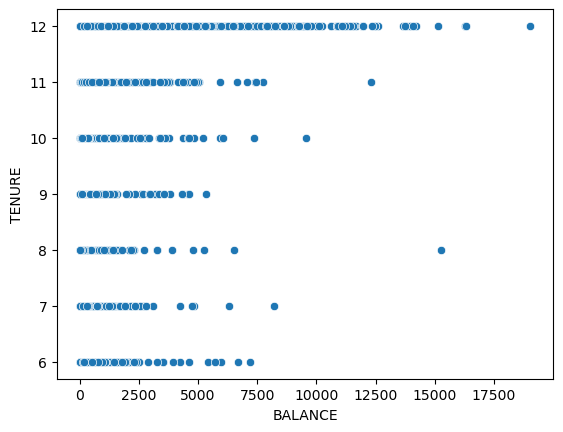

In [13]:
sns.scatterplot(data=df_eda, x= df_eda['BALANCE'],y= df_eda['TENURE'])

Terlihat bahwa dengan Tenure yang semakin lama, Balance nya juga semakin banyak.

<Axes: xlabel='PAYMENTS', ylabel='CREDIT_LIMIT'>

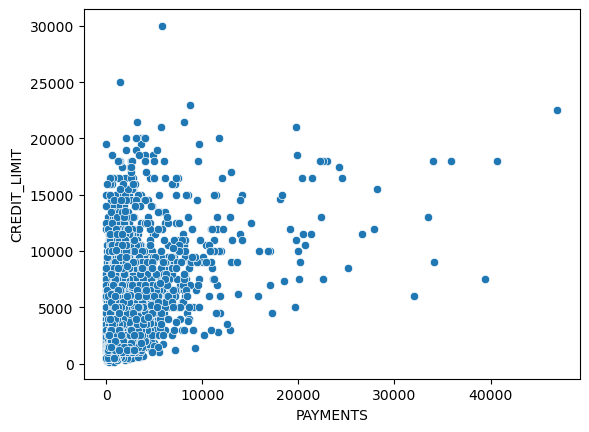

In [14]:
sns.scatterplot(data=df_eda, x= df_eda['PAYMENTS'],y= df_eda['CREDIT_LIMIT'])

Tidak terlihat ada relasi khusus antara limit credit dan payment. Namun disini terlihat jelas banyak nasabah yang limitnya tinggi melakukan pembayaran dengan sedikit juga. Mungkin bisa diasumsikan bahwa nasabah banyak belanja tidak sesuai level ekonominya sehingga mengambil cicilan untuk membelinya.

<Axes: xlabel='MINIMUM_PAYMENTS', ylabel='CREDIT_LIMIT'>

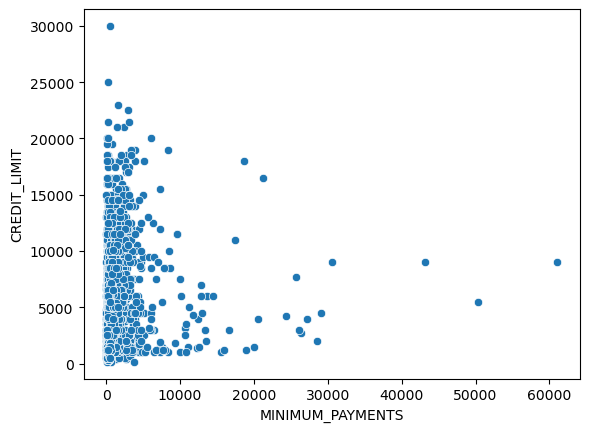

In [15]:
sns.scatterplot(data=df_eda, x= df_eda['MINIMUM_PAYMENTS'],y= df_eda['CREDIT_LIMIT'])

Disini terlihat anomali data. Terlihat bahwa ada nasabah yang memiliki credit limit sekitar 10ribu membayar minimum payment sebesar 60ribu.

# Data Cleaning & Preprocessing

### Drop Kolom

Karena kolom CUST_ID sangat unique, maka akan di drop saja karena memang tidak ada korelasinya.

In [16]:
df_clean = df_eda.copy()

In [17]:
# drop kolom cust id
df_clean = df_clean.drop(['CUST_ID'], axis=1)

In [18]:
df_clean

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       16.581535           0.125000     200.00              0.00   
1      943.584041           0.875000     103.00            103.00   
2        1.979916           0.125000      80.00             80.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
...           ...                ...        ...               ...   
4460  1079.008102           1.000000       0.00              0.00   
4461   809.582978           0.909091       0.00              0.00   
4462  3386.490883           1.000000     560.98            427.22   
4463  4840.545574           1.000000    1595.93           1595.93   
4464  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4460                    0.00   1259.571764             0.000000   
4461                    0.00   3819.672466             0.000000   
4462                  133.76   2008.153534             1.000000   
4463                    0.00   4359.325750             0.454545   
4464                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4460                    0.000000                          0.000000   
4461                    0.000000                          0.000000   
4462                    0.727273                          0.363636   
4463                    0.454545                          0.000000   
4464                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4460                0.545455                 9              0        1200.0   
4461                0.545455                 7              0        4150.0   
4462                0.545455                 9             20       10100.0   
4463                0.545455                17             25        6000.0   
4464                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN          0.000000       8  
1      215.325023        410.484825          0.000000       8  
2        0.000000               NaN          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
...           ...               ...               ...     ...  
4460  1379.635287        271.364415          0.090909      11  
4461  4372.148648        241.645387          0.090909      11  
4462  1039

In [19]:
df_clean['CASH_ADVANCE'].value_counts()

0.000000       2316
395.725602        1
523.015459        1
451.336788        1
1007.849308       1
               ... 
1150.890874       1
611.764160        1
5396.550576       1
1654.916972       1
4335.919227       1
Name: CASH_ADVANCE, Length: 2150, dtype: int64

### Handling Missing Value

Karena dari EDA terlihat ada kolom yang berisi missing value, selanjutnya akan di handling vissing value karena untuk kasus clustering, terutama di algoritma K-Means, yang cara kerja nya adalah mengukur jarak antara data dengan centroidnya. Dengan adanya missing value, keakuratan clustering akan berkurang. Berhubung datanya sedikit dan kasus ini adalah clustering, maka akan di impute saja menggunakan KNN Imputer.

In [20]:
# list kolom null
nan_col = df_clean.columns[df_clean.isnull().any()].tolist()

# imputasi
imputer = KNNImputer()
df_imp = pd.DataFrame(imputer.fit_transform(df_clean[nan_col]), columns=nan_col)
df_clean = df_clean.fillna(df_imp)

In [21]:
df_clean.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [22]:
X = df_clean.copy()

In [23]:
clus_sample = df_clean.index.tolist()

### Handling Outlier

In [24]:
# mengecek nilai skewness dari tiap kolom dataset model

for i in df_clean.columns:
    print(i, ': ', df_clean[i].skew())

BALANCE :  2.4560238499593767
BALANCE_FREQUENCY :  -2.0200474640744686
PURCHASES :  8.979251259740165
ONEOFF_PURCHASES :  10.13050253522181
INSTALLMENTS_PURCHASES :  8.109902892925229
CASH_ADVANCE :  4.735025820335382
PURCHASES_FREQUENCY :  0.059245594091176385
ONEOFF_PURCHASES_FREQUENCY :  1.5220924811670231
PURCHASES_INSTALLMENTS_FREQUENCY :  0.5073788038737267
CASH_ADVANCE_FREQUENCY :  1.8218437284437328
CASH_ADVANCE_TRX :  4.748150105430486
PURCHASES_TRX :  4.476383934682108
CREDIT_LIMIT :  1.5444030868617815
PAYMENTS :  6.0353060029532415
MINIMUM_PAYMENTS :  12.522138012434562
PRC_FULL_PAYMENT :  1.9080934076320049
TENURE :  -2.931835630503882


In [25]:
# menghitung jumlah outliers pada kolom terdistribusi normal

for i in df_clean[['PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']]:
    rata2 = df_clean[i].mean()
    upper = rata2 + (3*(df_clean[i].std()))
    lower = rata2 - (3*(df_clean[i].std()))
    outlier = df_clean[(df_clean[i] <= lower) | (df_clean[i] >= upper)]

    print(i,'outliers percentage : ', len(outlier)/df_clean[i].shape[0] * 100, '%')

PURCHASES_FREQUENCY outliers percentage :  0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY outliers percentage :  0.0 %


Untuk kolom yang terdistribusi normal, tidak terdeteksi adanya outlier.

In [26]:
# menghitung jumlah outliers pada kolom terdistribusi skewed

for i in df_clean[['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
                    'ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX',
                    'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']]:
    Q1 = df_clean[i].quantile(.25)
    Q3 = df_clean[i].quantile(.75)
    IQR = Q3 - Q1
    upper = Q3 + (3*IQR)
    lower = Q1 - (3*IQR)
    outlier = df_clean[(df_clean[i] <= lower) | (df_clean[i] >= upper)]

    print(i, 'outliers percentage : ', len(outlier)/df_clean[i].shape[0] * 100, '%')

BALANCE outliers percentage :  2.284434490481523 %
BALANCE_FREQUENCY outliers percentage :  13.012318029115342 %
PURCHASES outliers percentage :  4.076147816349384 %
ONEOFF_PURCHASES outliers percentage :  6.203807390817469 %
INSTALLMENTS_PURCHASES outliers percentage :  4.120940649496081 %
CASH_ADVANCE outliers percentage :  5.464725643896976 %
ONEOFF_PURCHASES_FREQUENCY outliers percentage :  0.0 %
CASH_ADVANCE_FREQUENCY outliers percentage :  2.3516237402015676 %
CASH_ADVANCE_TRX outliers percentage :  4.456886898096305 %
PURCHASES_TRX outliers percentage :  3.8521836506159013 %
CREDIT_LIMIT outliers percentage :  0.3807390817469205 %
PAYMENTS outliers percentage :  4.389697648376259 %
MINIMUM_PAYMENTS outliers percentage :  4.300111982082867 %
PRC_FULL_PAYMENT outliers percentage :  10.32474804031355 %
TENURE outliers percentage :  100.0 %


Terlihat dari list persentase outlier, banyak sekali kolom yang memiliki outlier. Terutama kolom TENURE. Disini saya memutuskan untuk drop kolom TENURE dan capping outlier diatas 5 persen saja. Dikarenakan jika dihandle terlalu banyak, akan membuat data menjadi kurang real.

In [27]:
# drop kolom tenure
df_clean = df_clean.drop(['TENURE'], axis=1)

In [28]:
# melakukan capping pada outliers

wins_skw = Winsorizer(capping_method='iqr', fold=3, tail='both', variables=['BALANCE_FREQUENCY','ONEOFF_PURCHASES', 
                                                                            'CASH_ADVANCE', 'PRC_FULL_PAYMENT'])
df_model = wins_skw.fit_transform(df_clean)

In [29]:
col_wins = ['BALANCE_FREQUENCY','ONEOFF_PURCHASES', 'CASH_ADVANCE', 'PRC_FULL_PAYMENT']

### Scaling

Selanjutnya akan dilakukan scaling menggunakan standard scaler.

In [30]:
# scaling
df_scale = pd.DataFrame(StandardScaler().fit_transform(df_clean))

In [31]:
# PCA
pca = PCA()
pca.fit(df_scale)

cumsum = np.cumsum(pca.explained_variance_ratio_)
# check elbow with visualization
d = np.argmax(cumsum >= 0.85) + 1
d

8

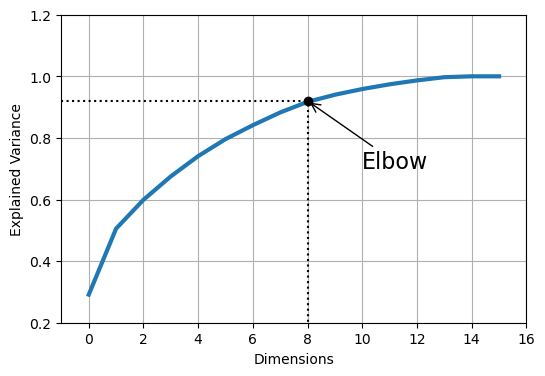

In [32]:
# elbow method pca
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([-1, 16, 0.2, 1.2])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [-1, 0.92], "k:")
plt.plot([-1, d], [0.92, 0.92], "k:")
plt.plot(d, 0.92, "ko")
plt.annotate("Elbow", xy=(8, 0.92), xytext=(10, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [33]:
# digunakan pca 0.9
pca = PCA(n_components=0.9)
df_reduced = pd.DataFrame(pca.fit_transform(df_scale))
pca.n_components_

9

In [34]:
np.sum(pca.explained_variance_ratio_)

0.9171005655345449

In [35]:
df_reduced

0         1         2         3         4         5         6  \
0    -1.956512 -1.507761  1.849074  0.296057  1.263216  0.465721 -0.553629   
1    -1.590254 -0.815645  0.500903  0.912984 -0.349079  0.466408  0.005849   
2    -1.972937 -1.342060  1.903491  0.679181  1.174869  0.189625 -0.037739   
3    -1.361450 -0.817766  0.492573  0.911401 -0.710327  0.668803  0.064772   
4    -0.950128 -0.588920  0.734420  1.122869 -0.744205  0.741233  0.057749   
...        ...       ...       ...       ...       ...       ...       ...   
4460 -2.052338  1.390811  0.129194 -0.604732 -0.814666  1.200526  0.457074   
4461 -1.699483  2.141111  0.740584 -1.001846 -0.207874  0.538117  0.055935   
4462  0.837440  2.030469 -1.218221 -0.324983 -1.539496 -1.403621 -0.074956   
4463  0.115473  3.577486 -0.405169 -0.244295 -1.104417 -0.135210  0.922844   
4464  0.336382  2.573778 -1.640371 -2.466491 -0.151543  0.950393  0.083334   

             7         8  
0     1.862359  0.031540  
1    -0.302600 -0.199883  
2     2.056543 -0.033886  
3    -0.697074 -0.265253  
4    -0.762175 -0.241698  
...        ...       ...  
4460 -0.331779  0.648661  
4461 -0.352709 -0.208630  
4462  1.148685  0.617710  
4463  0.841140  0.669366  
4464  0.781700  0.017337  

[4465 rows x 9 columns]

<Axes: xlabel='0', ylabel='1'>

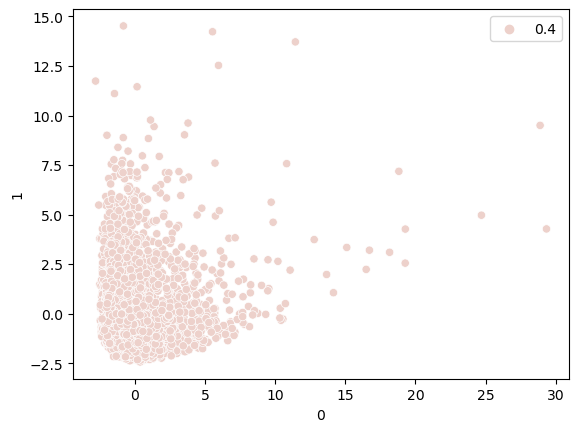

In [36]:
# untuk visuaklisasi hanya digunakan 2 pc
pca_viz = PCA(n_components=2)
df_viz = pd.DataFrame(pca_viz.fit_transform(df_scale))
sns.scatterplot(data=df_viz, x=df_viz[0], y=df_viz[1], hue=0.4)

In [37]:
# Pipeline model
pipe = Pipeline([
    ('wins', Winsorizer(capping_method='iqr', fold=3, tail='both', variables=['BALANCE_FREQUENCY','ONEOFF_PURCHASES', 
                                                                            'CASH_ADVANCE', 'PRC_FULL_PAYMENT'])),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=.90))
])

In [38]:
X.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    16.581535              0.125      200.0               0.0   
1   943.584041              0.875      103.0             103.0   
2     1.979916              0.125       80.0              80.0   
3   461.455720              1.000      585.0             585.0   
4  1053.594730              1.000     1450.0            1450.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000        299.559201               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000       1500.504140               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8

In [39]:
# transform X
X_tr = pipe.fit_transform(X)
X_tr

array([[-2.02191728, -1.72159704, -1.47140848, ..., -0.57207759,
        -0.57689297, -0.06658844],
       [-1.78282472, -1.12078863, -0.69336546, ..., -0.45897716,
         0.86715592, -0.16767787],
       [-2.01745209, -1.55349089, -1.546538  , ..., -0.15626795,
        -0.56742316, -0.08367204],
       ...,
       [ 0.65726499,  2.43273363,  0.32775145, ..., -0.61043691,
        -0.52925311,  0.44739051],
       [-0.0470397 ,  4.17676069, -0.49699934, ...,  0.82640345,
        -0.49318272,  0.57621172],
       [-0.14476695,  3.13712299,  0.85008123, ...,  0.33703999,
        -0.83794023, -0.28956781]])

Text(0, 0.5, 'wcss')

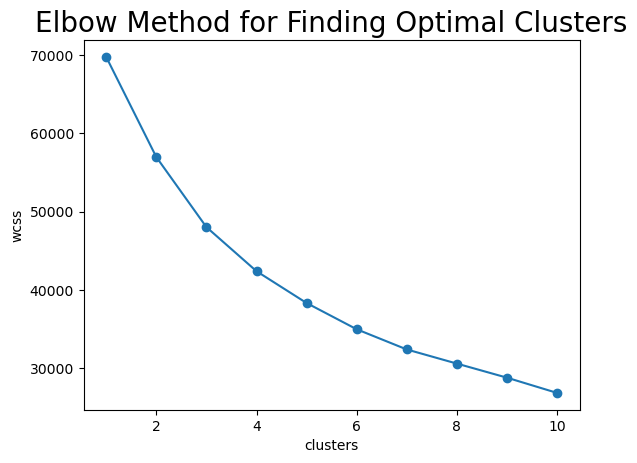

In [40]:
# model building, elbow method
from sklearn.cluster import KMeans

wcss= []

for i in range(1,11): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X_tr)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss, marker='o')
plt.title('Elbow Method for Finding Optimal Clusters', fontsize =20)
plt.xlabel('clusters')
plt.ylabel('wcss')

Untuk memutuskan jumlah clusternya, digunakan elbow method. Dari visualisasi dari jumlah cluster vs. inertia. Inertia pada dasarnya adalah seberapa dekat data yang didalam cluster terhadap centroidnya. Terlihat bahwa cluster yang terbaik adalah 4 cluster. Karena setelahnya secara grafik mulai melandai yang artinya cluster yang lebih dari 4 tidak akan efisien dalam model yang kemungkinan akan mempengaruhi apakah model good fit atau tidak.

Berhubung hasil visualisasi mungkin masih belum terlalu jelas karena plot tidak membentuk siku yang cukup tajam, selanjutnya akan dicoba cek menggunakan silhouette method

In [41]:
# membuat fungsi untuk menampilkan hasil silhouette method

def plot_silhouette(model,range_n_clusters,X,model_name):
    for n_clusters in range_n_clusters:
        # buat subplot 1 row dan 2 kolom
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # subplot 1 adalah plot silhouette
        ax1.set_xlim([-0.1, 1])
        # (n_clusters+1)*10 untuk memasukan blankspace agar perbedaannya terlihat jelas
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = model(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        # silhouette score adalah rata2 keseluruhan
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # hitung silhouette value
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # agregasi silhouette score untuk sampel milik cluster i dan urutkan
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # label silhouette plot dengan jumlah cluster di tengahnya
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # hitung y_lower baru untuk plot setelahnya
            y_lower = y_upper + 10  

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # garis yang menggambarkan rata2 silhouette
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([]) 
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # plot kedua menggambarkan cluster yang terbentuk
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')


        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle((f"Silhouette analysis for {model_name} clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.23890285694972332
For n_clusters = 3 The average silhouette_score is : 0.2823595580871909
For n_clusters = 4 The average silhouette_score is : 0.24407904008534115
For n_clusters = 5 The average silhouette_score is : 0.23470768839231657
For n_clusters = 6 The average silhouette_score is : 0.24705913785983905
For n_clusters = 7 The average silhouette_score is : 0.25601532424676227
For n_clusters = 8 The average silhouette_score is : 0.2632184634407032
For n_clusters = 9 The average silhouette_score is : 0.2568798094057215
For n_clusters = 10 The average silhouette_score is : 0.2553587491216287


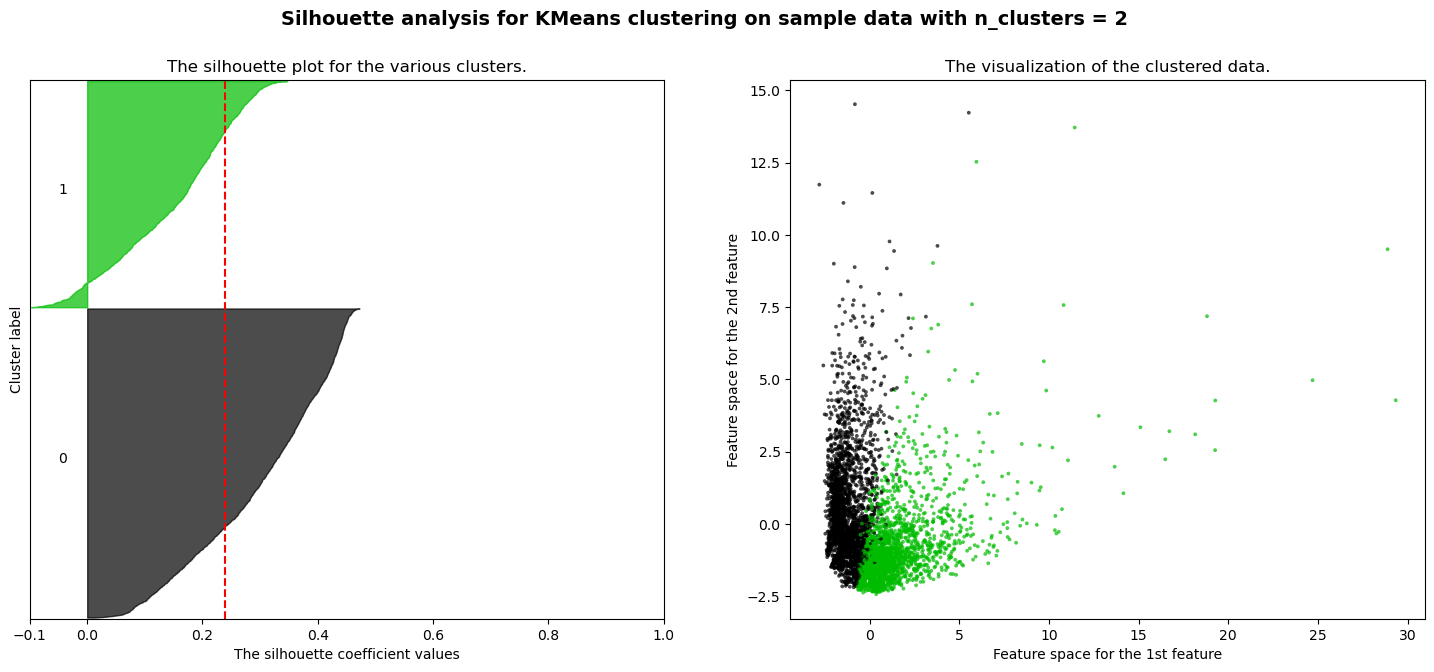

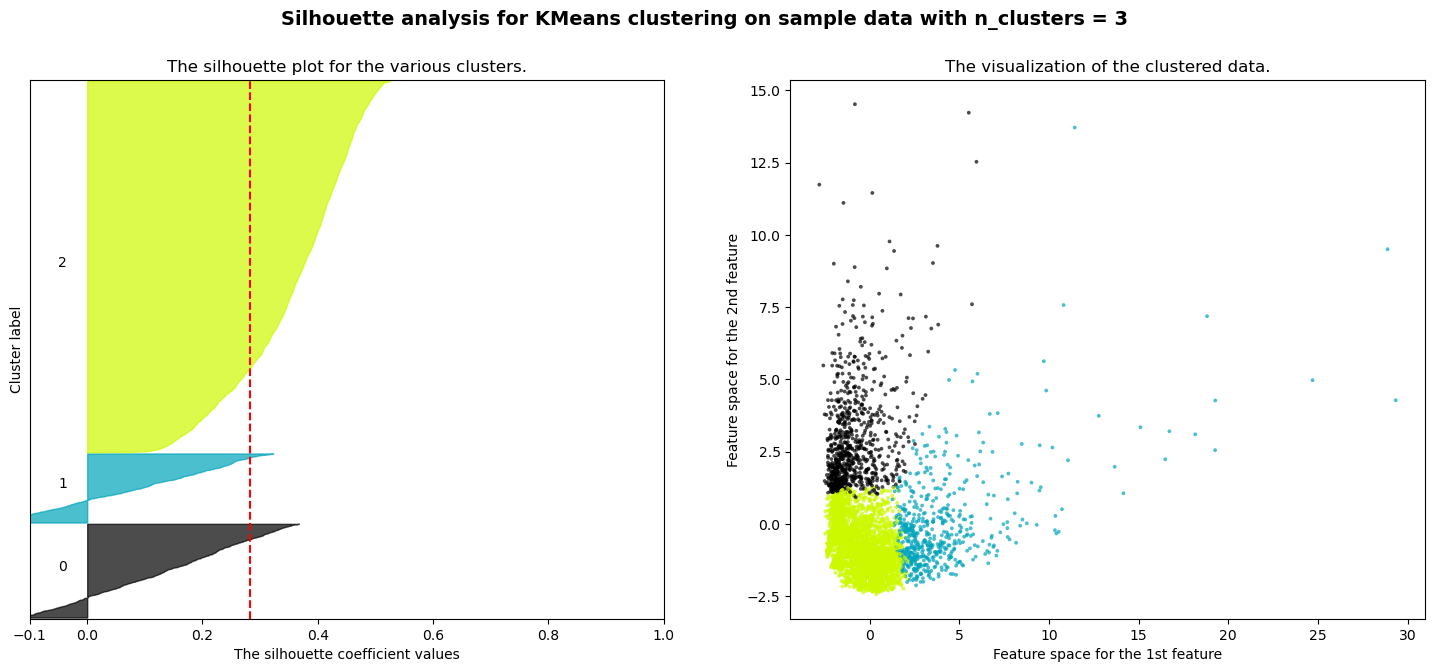

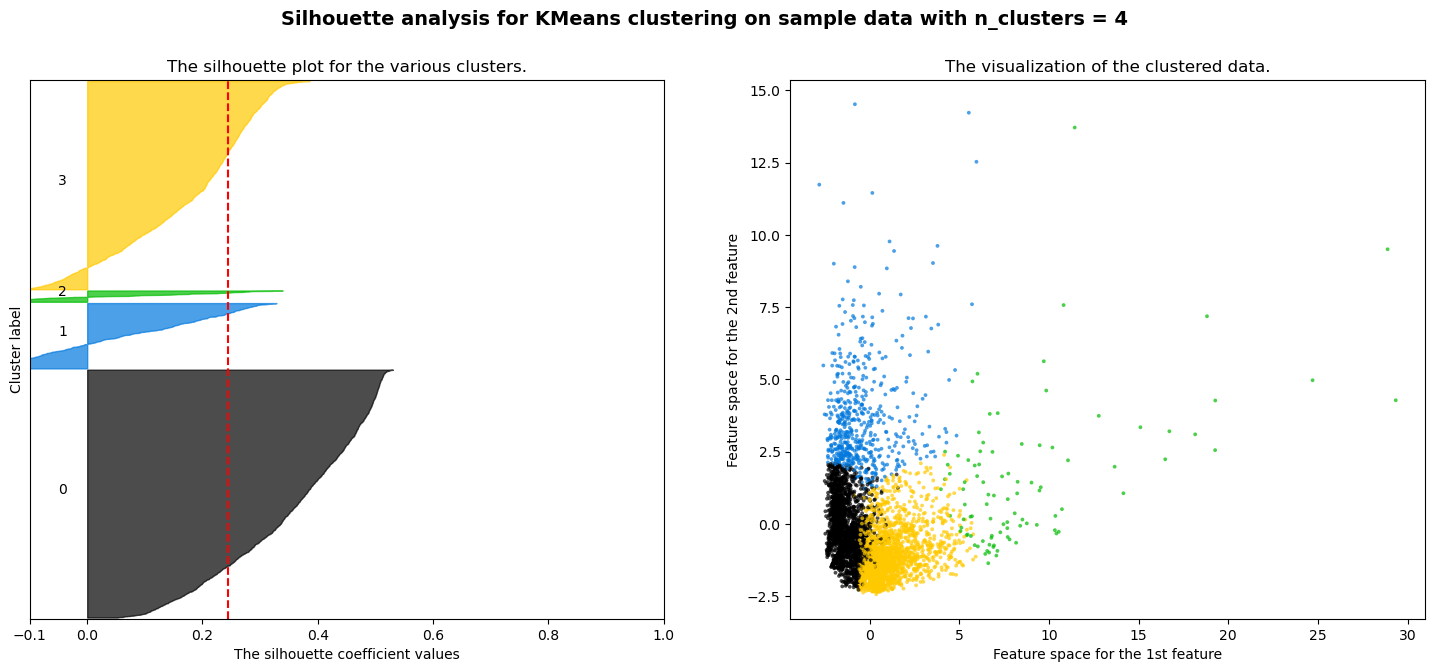

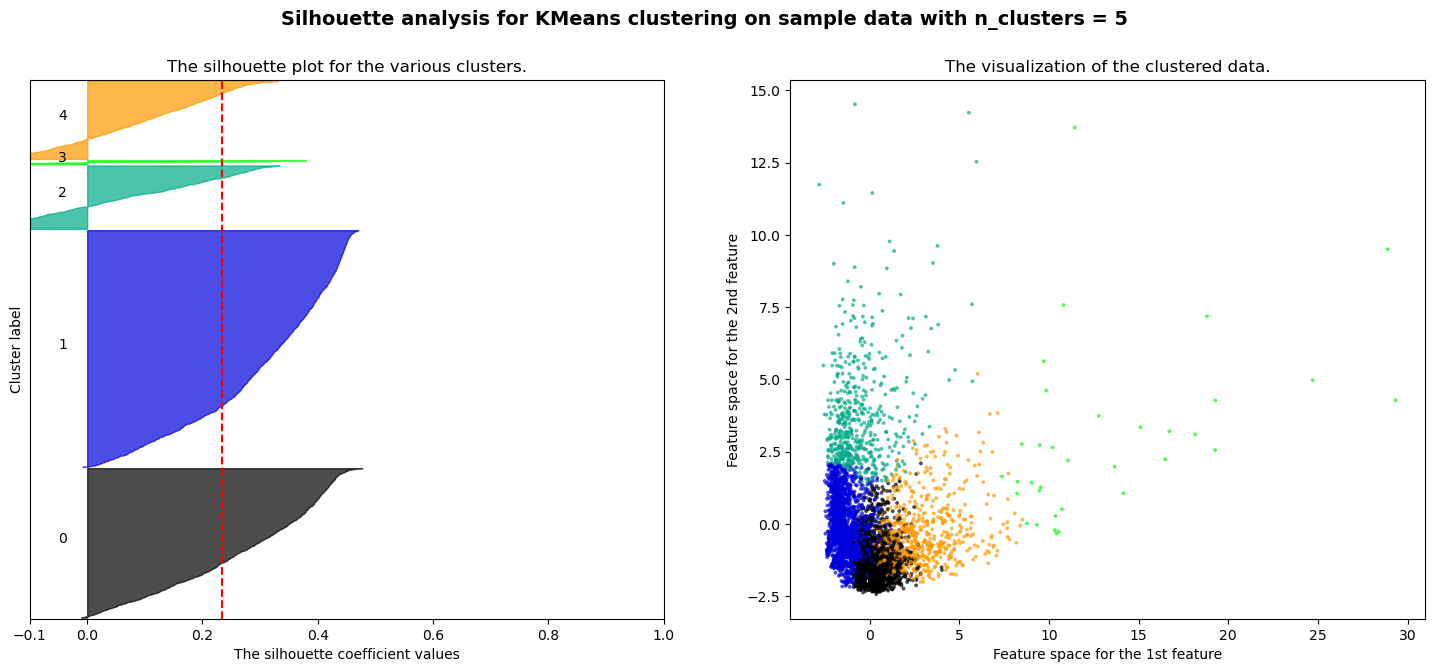

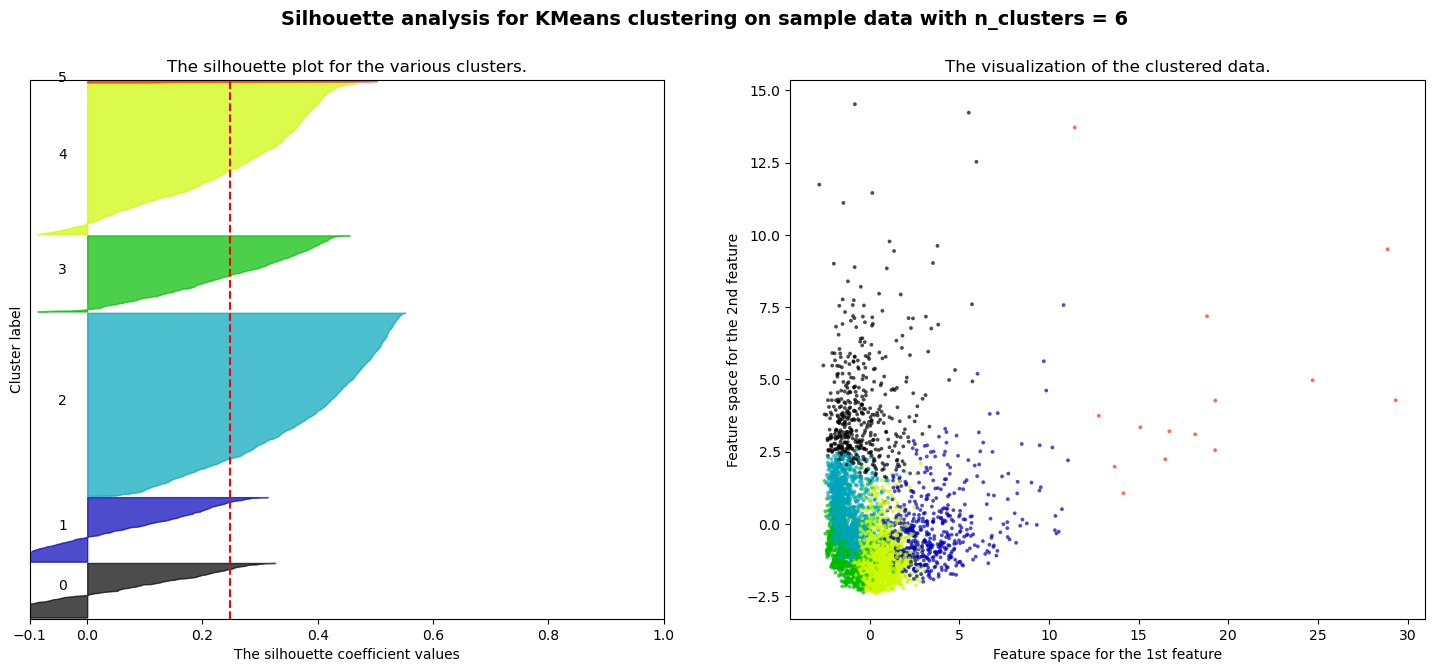

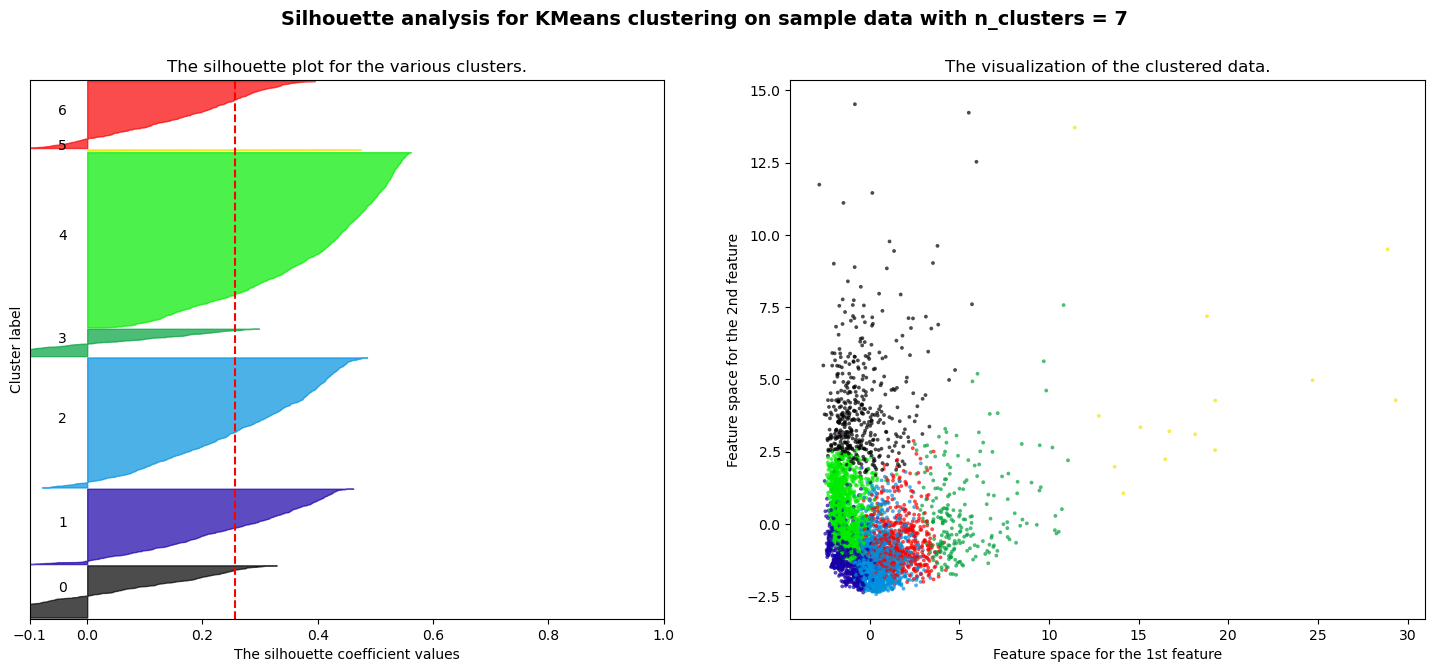

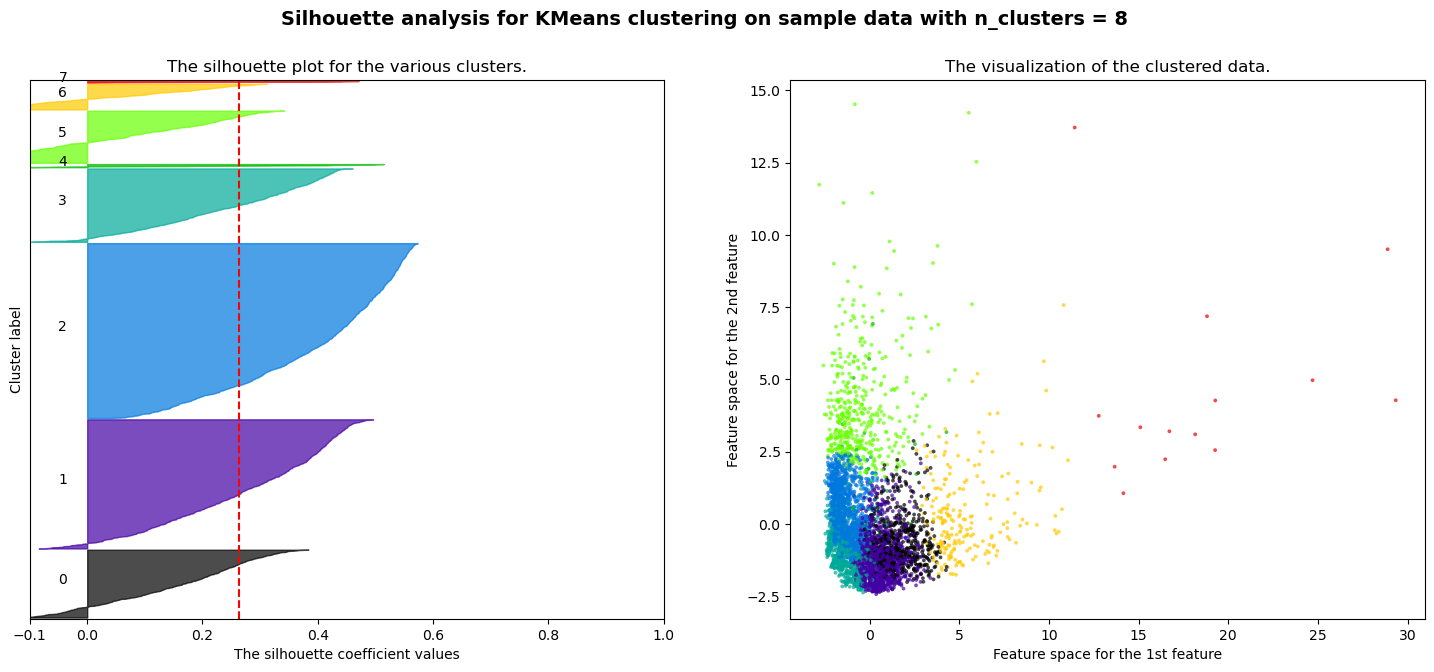

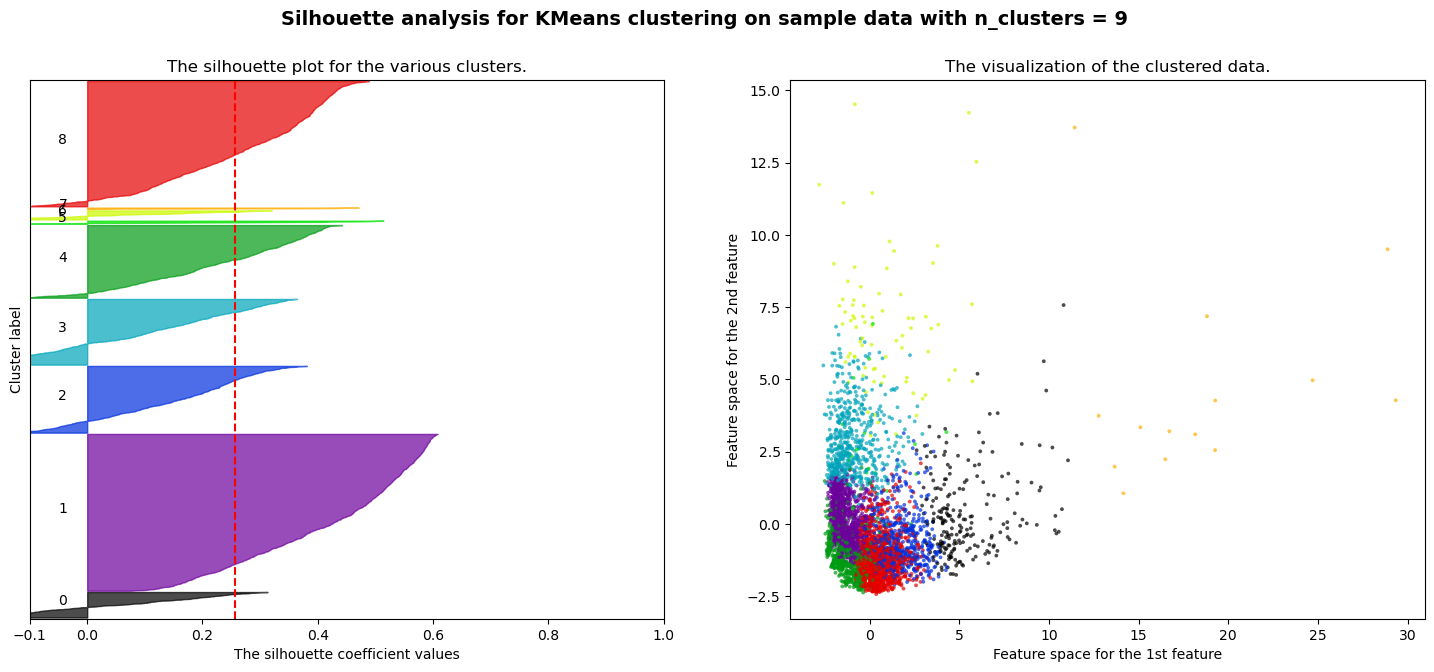

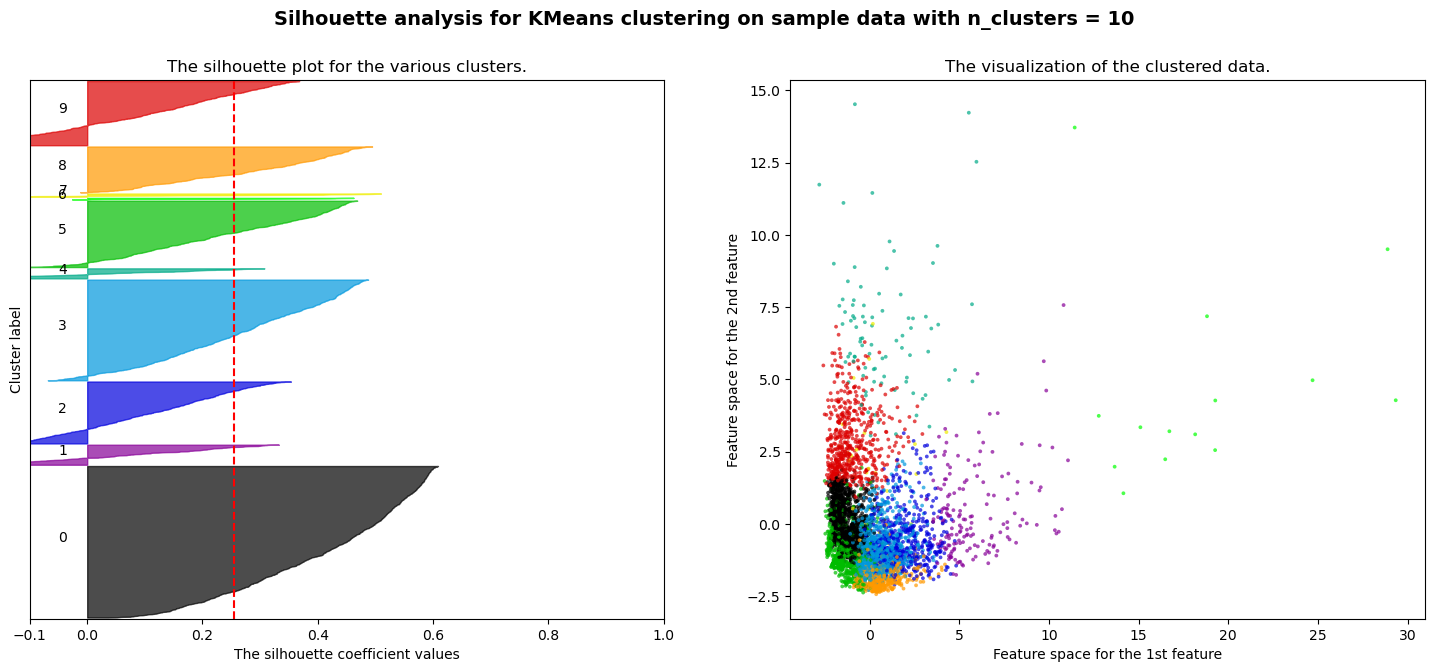

In [42]:
# visualisasi silhouette methode untuk berbagai macam nilai K

K = [2,3,4,5,6,7,8,9,10]
plot_silhouette(KMeans,K,df_reduced.values,'KMeans')

Setelah dicek menggunakan silhouette score dan di cek scatterplotnya, hasil yang terbaik adalah jumlah cluster 3. Begitu saya cek kembali di elbow methodnya, jumlah cluster 3 juga cukup baik. Oleh karena itu akan dipilih jumlah sebanyak 3.

In [43]:
# model dengan 4 cluster dan fit predict ke dataframe
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
label = km.fit_predict(X_tr)

X['label'] = label

In [44]:
X['constant'] = 'constant'

<Axes: xlabel='0', ylabel='1'>

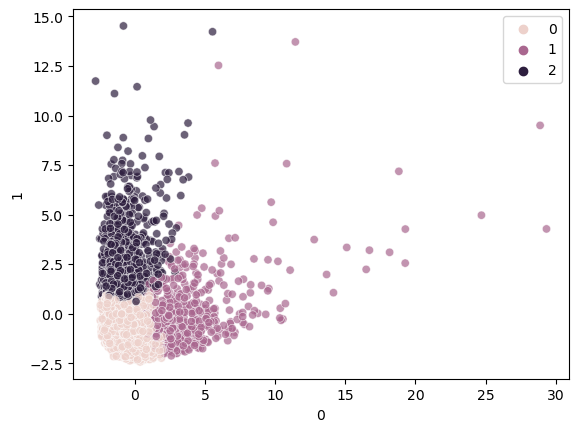

In [45]:
# visualisasi segmentasi dengan 2 pc
sns.scatterplot(data = df_viz, x=df_viz[0],y= df_viz[1], hue=label, alpha=.7)

In [46]:
df_cls = mentah.loc[clus_sample].copy()
df_cls

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0         788    16.581535           0.125000     200.00              0.00   
1        1902   943.584041           0.875000     103.00            103.00   
2        2322     1.979916           0.125000      80.00             80.00   
3        3426   461.455720           1.000000     585.00            585.00   
4        3976  1053.594730           1.000000    1450.00           1450.00   
...       ...          ...                ...        ...               ...   
4460     4630  1079.008102           1.000000       0.00              0.00   
4461     8614   809.582978           0.909091       0.00              0.00   
4462     4296  3386.490883           1.000000     560.98            427.22   
4463     4476  4840.545574           1.000000    1595.93           1595.93   
4464     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4460                    0.00   1259.571764             0.000000   
4461                    0.00   3819.672466             0.000000   
4462                  133.76   2008.153534             1.000000   
4463                    0.00   4359.325750             0.454545   
4464                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4460                    0.000000                          0.000000   
4461                    0.000000                          0.000000   
4462                    0.727273                          0.363636   
4463                    0.454545                          0.000000   
4464                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4460                0.545455                 9              0        1200.0   
4461                0.545455                 7              0        4150.0   
4462                0.545455                 9             20       10100.0   
4463                0.545455                17             25        6000.0   
4464                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN          0.000000       8  
1      215.325023        410.484825          0.000000       8  
2        0.000000               NaN          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
...           ...               ...               ...     ...  
4460  1379.635287        2

In [47]:
df_cls['cluster'] = label
df_cls

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0         788    16.581535           0.125000     200.00              0.00   
1        1902   943.584041           0.875000     103.00            103.00   
2        2322     1.979916           0.125000      80.00             80.00   
3        3426   461.455720           1.000000     585.00            585.00   
4        3976  1053.594730           1.000000    1450.00           1450.00   
...       ...          ...                ...        ...               ...   
4460     4630  1079.008102           1.000000       0.00              0.00   
4461     8614   809.582978           0.909091       0.00              0.00   
4462     4296  3386.490883           1.000000     560.98            427.22   
4463     4476  4840.545574           1.000000    1595.93           1595.93   
4464     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4460                    0.00   1259.571764             0.000000   
4461                    0.00   3819.672466             0.000000   
4462                  133.76   2008.153534             1.000000   
4463                    0.00   4359.325750             0.454545   
4464                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4460                    0.000000                          0.000000   
4461                    0.000000                          0.000000   
4462                    0.727273                          0.363636   
4463                    0.454545                          0.000000   
4464                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4460                0.545455                 9              0        1200.0   
4461                0.545455                 7              0        4150.0   
4462                0.545455                 9             20       10100.0   
4463                0.545455                17             25        6000.0   
4464                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0        0.000000               NaN          0.000000       8        0  
1      215.325023        410.484825          0.000000       8        0  
2        0.000000               NaN          0.000000       8        0  
3      258.032630        151.696433          0.000000       8        0  
4      397.090516        227.143184          0.000000       8        0  
...           ...               ... 

In [48]:
# cek rata-rata masing masing kolom tiap cluster
df_cls.groupby('cluster').mean()

CUST_ID      BALANCE  BALANCE_FREQUENCY    PURCHASES  \
cluster                                                             
0        4515.533034   774.009242           0.829661   478.299076   
1        4419.683333  2131.811435           0.980928  3884.169278   
2        4373.220141  3771.062589           0.953212   360.313150   

         ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
cluster                                                           
0              209.072968              269.761204    282.379358   
1             2556.610750             1327.626583    438.644367   
2              218.577272              141.814274   3770.658113   

         PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
cluster                                                    
0                   0.458426                    0.113590   
1                   0.931766                    0.682613   
2                   0.228180                    0.100109   

         PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
cluster                                                             
0                                0.351857                0.064522   
1                                0.685155                0.061437   
2                                0.142811                0.431756   

         CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
cluster                                                               
0                1.125908       8.426150   3161.227080   884.792068   
1                1.423611      50.320833   7650.694444  3683.635477   
2               11.722482       4.948478   6356.674473  2939.242389   

         MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
cluster                                                 
0              552.114270          0.163758  11.495330  
1             1030.060633          0.270695  11.872222  
2             1696.765194          0.041183  11.285714

In [49]:
# memisah dataframe berdasarkan cluster
cluster_0 = df_cls[df_cls['cluster'] == 0]
cluster_1 = df_cls[df_cls['cluster'] == 1]
cluster_2 = df_cls[df_cls['cluster'] == 2]

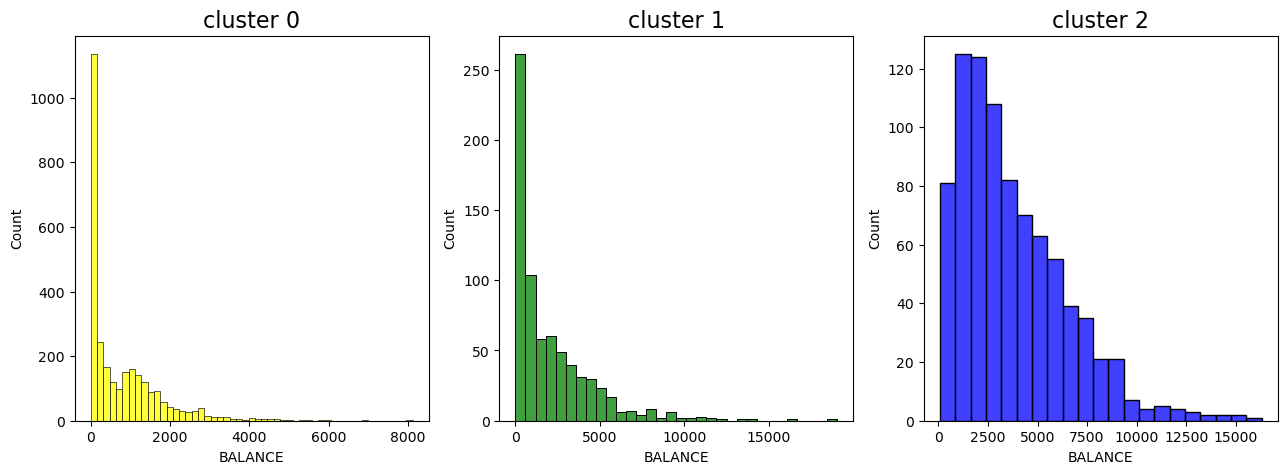

In [50]:
# visualisasi balance tiap cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['BALANCE'], color = 'yellow')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['BALANCE'], color='green' )
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['BALANCE'], color='blue')
plt.title('cluster 2', size = 16)

plt.show()

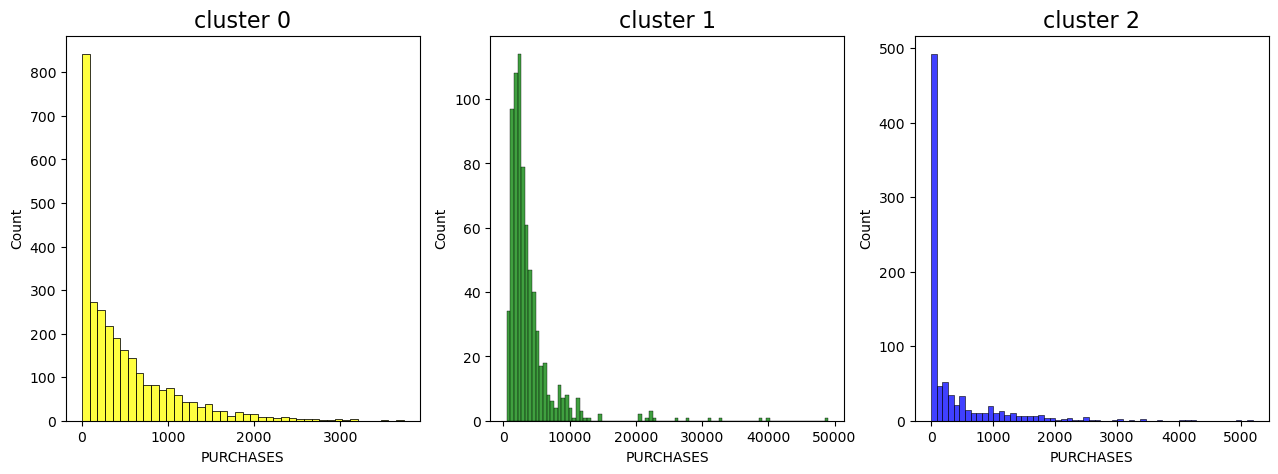

In [51]:
# visualisasi purchases tiap cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['PURCHASES'], color = 'yellow')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['PURCHASES'], color='green' )
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['PURCHASES'], color='blue')
plt.title('cluster 2', size = 16)

plt.show()

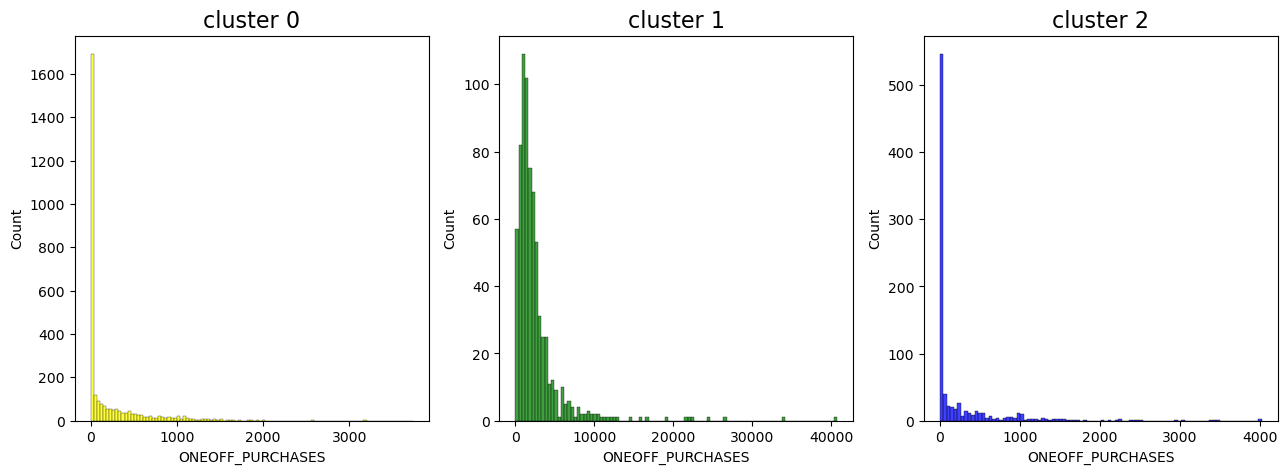

In [52]:
# visualisasi oneoff purchases masing masing cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['ONEOFF_PURCHASES'], color = 'yellow')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['ONEOFF_PURCHASES'], color='green' )
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['ONEOFF_PURCHASES'], color='blue')
plt.title('cluster 2', size = 16)

plt.show()

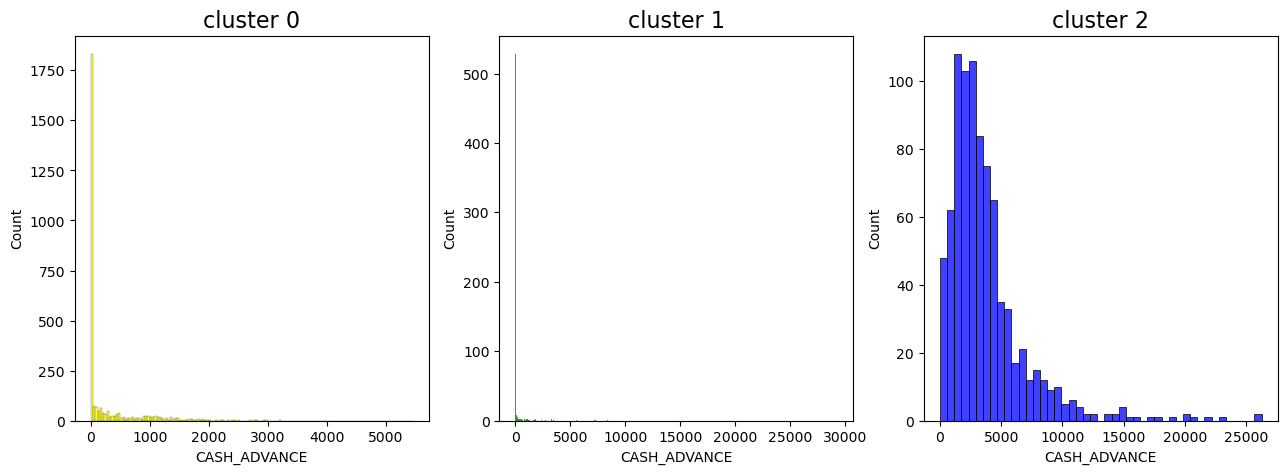

In [53]:
# visualisasi cash advance tiap cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['CASH_ADVANCE'], color = 'yellow')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['CASH_ADVANCE'], color='green' )
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['CASH_ADVANCE'], color='blue')
plt.title('cluster 2', size = 16)

plt.show()

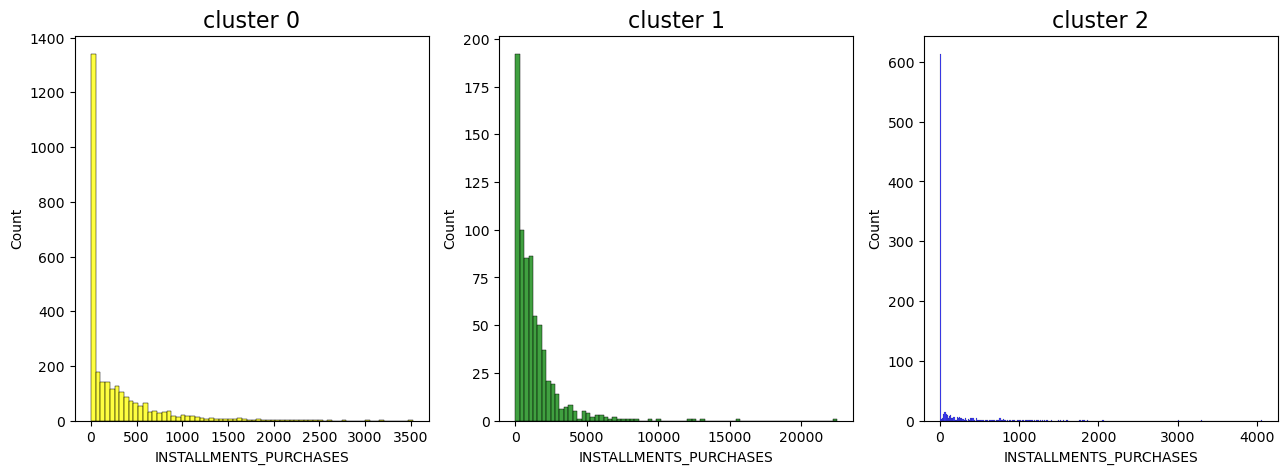

In [54]:
# visualisasi installments purchases tiap cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['INSTALLMENTS_PURCHASES'], color = 'yellow')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['INSTALLMENTS_PURCHASES'], color='green' )
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['INSTALLMENTS_PURCHASES'], color='blue')
plt.title('cluster 2', size = 16)

plt.show()

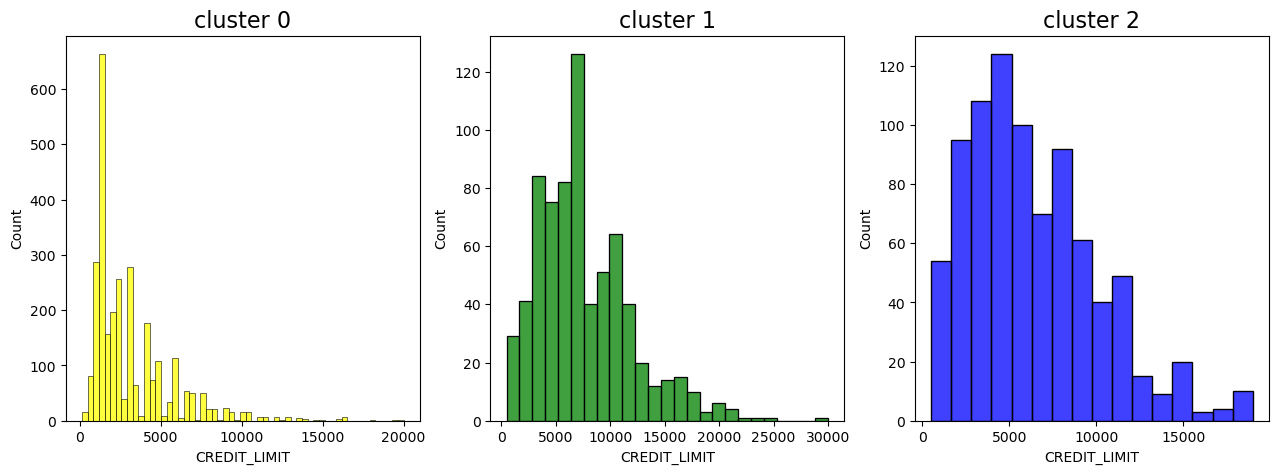

In [55]:
# visualisasi credit limit tiap cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['CREDIT_LIMIT'], color = 'yellow')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['CREDIT_LIMIT'], color='green' )
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['CREDIT_LIMIT'], color='blue')
plt.title('cluster 2', size = 16)

plt.show()

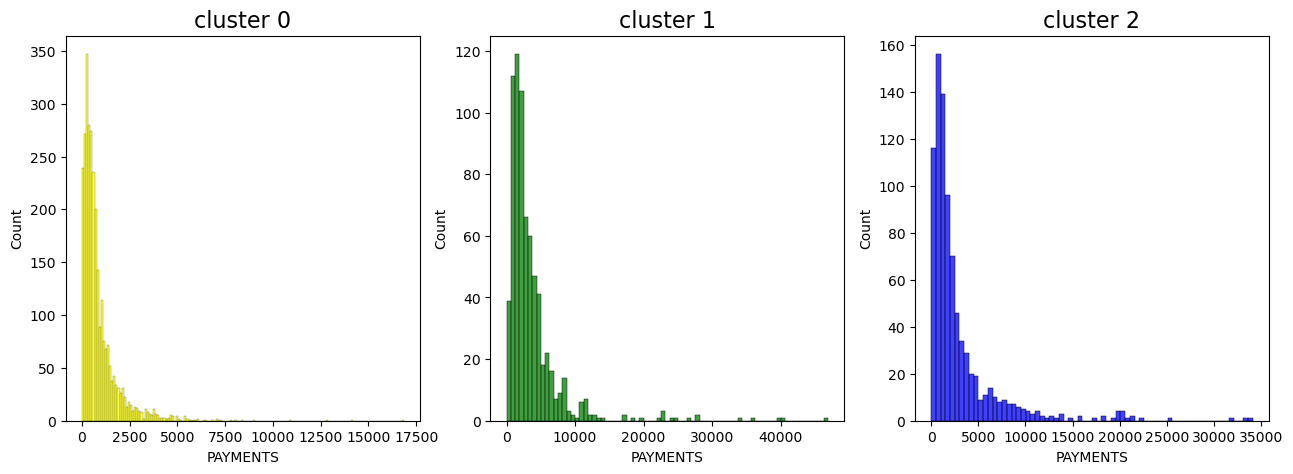

In [56]:
# visualisasi payments tiap cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['PAYMENTS'], color = 'yellow')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['PAYMENTS'], color='green' )
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['PAYMENTS'], color='blue')
plt.title('cluster 2', size = 16)

plt.show()

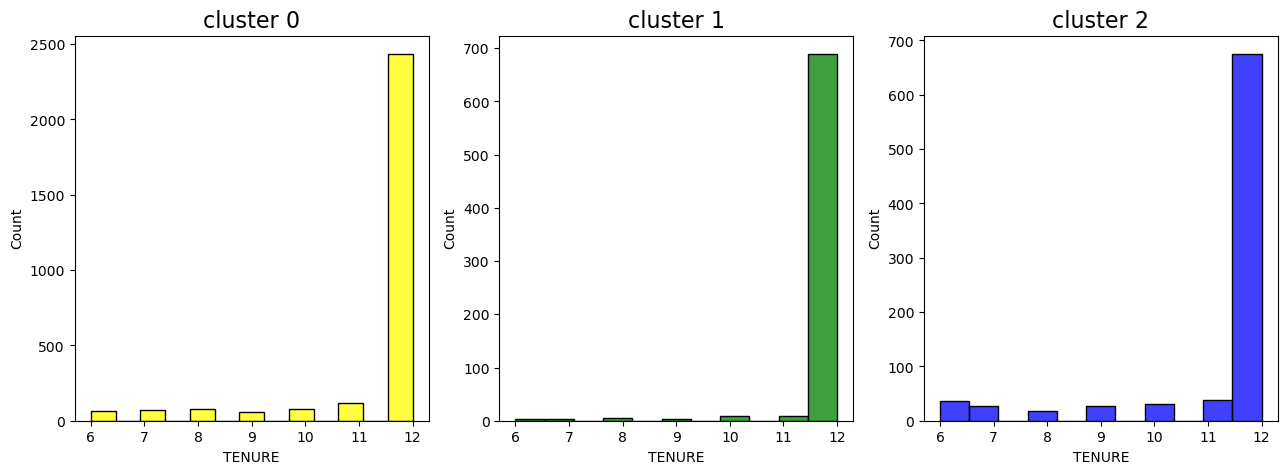

In [57]:
# visualisasi tenures tiap cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['TENURE'], color = 'yellow')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['TENURE'], color='green' )
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['TENURE'], color='blue')
plt.title('cluster 2', size = 16)

plt.show()

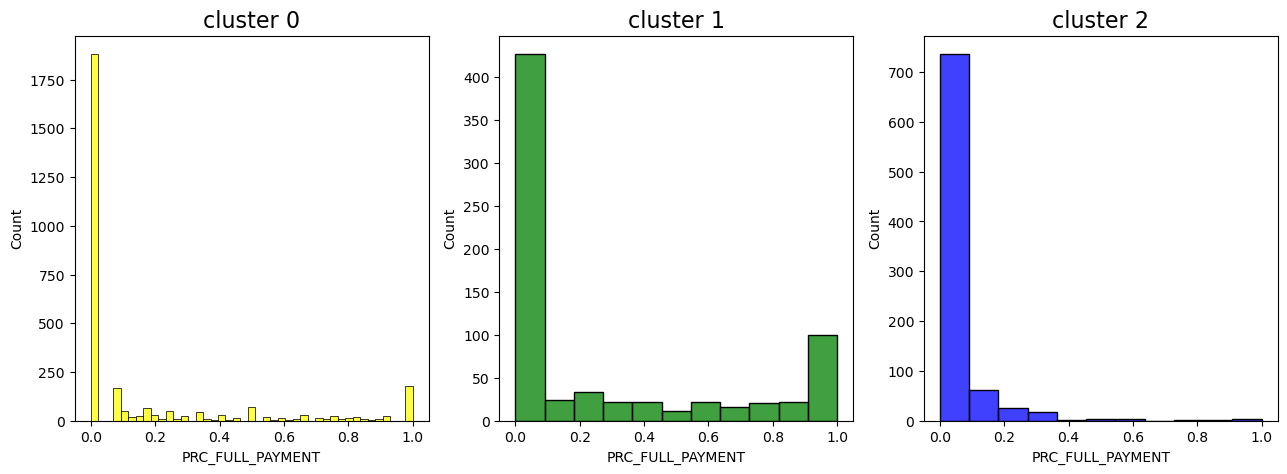

In [58]:
# visualisasi PRC_FULL_PAYMENT tiap cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['PRC_FULL_PAYMENT'], color = 'yellow')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['PRC_FULL_PAYMENT'], color='green' )
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['PRC_FULL_PAYMENT'], color='blue')
plt.title('cluster 2', size = 16)

plt.show()

Dari semua visualisasi diatas, terlihat sekali bahwa untuk cluster 0 memiliki jumlah transaksi yang sedikit. Cluster 1 lah yang paling sering berbelanja menggunakan kartu kredit ini dan cluster 2 paling sering transaksi dalam bentuk cash in advance. Mungkin untuk persebaran datanya dan bagaimana visualisasinya saat dikorelasikan dengan kolom yang lain dapat dibantu dengan pairplot.

In [59]:
df_cls.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'cluster'],
      dtype='object')

In [60]:
data = df_cls[['BALANCE', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'cluster']]

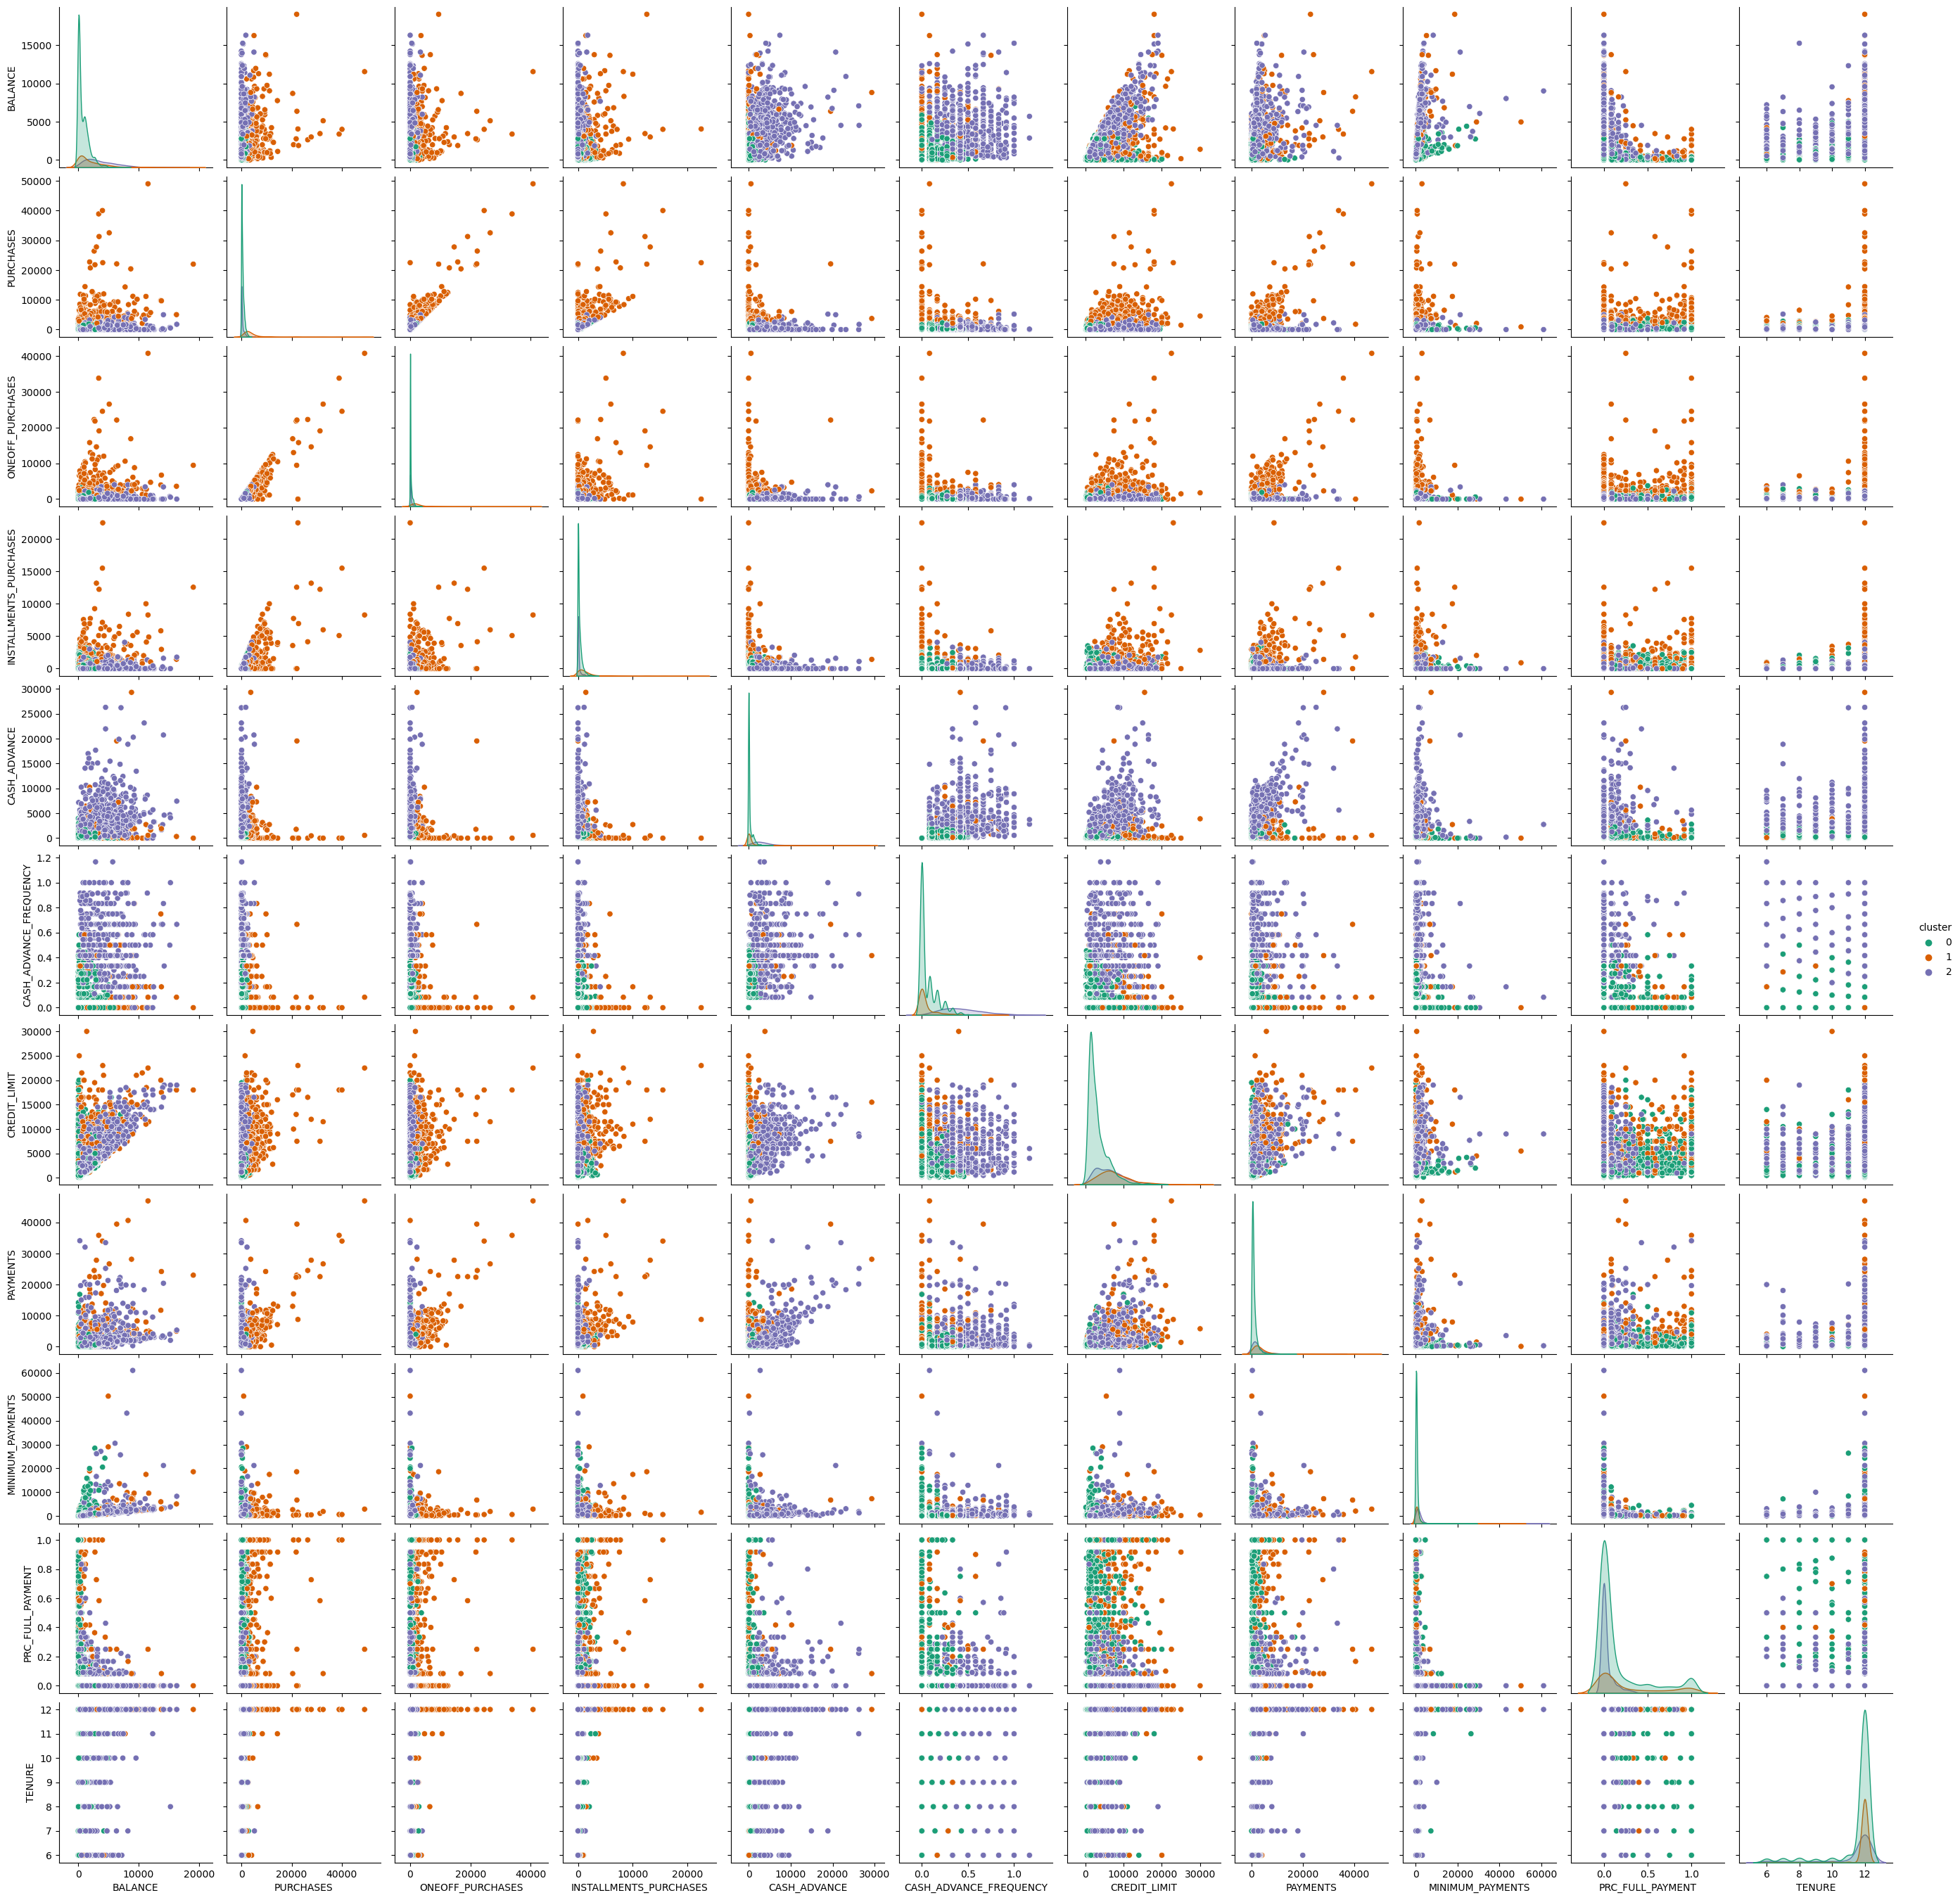

In [61]:
sns.pairplot(data=data,hue='cluster',palette='Dark2')

Terlihat sekali untuk cluster 1 sangat menyebar persebarannya. Disusul dengan cluster 2 dan yang sangat kecil variasinya ada di cluster 0. Secara keuangan, bisa dibilang cluster 2 adalah yang paling settle. Namun seringkali nasabah cluster 2 membutuhkan uang cash. Terlihat dari tingginya transaksi pada cash in advance. Selanjutnya adalah cluster 1. Cluster ini sangat menarik. Cluster ini memiliki balance yang sedikit namun belanjanya sangat banyak. Terlihat pada balance vs. purchases. Limit mereka pun besar dan cluster ini mendominasi sekali dalam hal yang berkaitan dengan belanja.

# Segment Evaluation & Conclusion

## Segment Evaluation
Setelah hasil clustering di eksplorasi, perbedaan cluster ini sudah terlihat. Kesimpulan untuk deskripsi cluster akhirnya dapat ditentukan. Berikut adalah uraiannya.

- cluster 0 =   Infrequent Users
- cluster 1 =   Prime Customers
- cluster 2 =   Revolvers

Pembagian diatas didasari pada behaviour masing-masing cluster. Berikut adalah uraiannya.

### Cluster 0
Cluster ini disebut Infrequent Users. Jika dilihat dari persebaran datanya saja, cluster ini paling sedikit variasinya. Secara balance mereka kecil. Secara spending juga sedikit. Nasabah ini kesehariannya lebih memilih untuk bertransaksi dengan cara lain. Kepemilikan kartu kredit hanya sebatas jaga-jaga saja. Limit mereka juga rendah. Namun jumlahnya banyak sekali. Hal ini mungkin perlu diatasi dengan promosi mengenai kelebihan dari kartu kredit dan dengan promo-promo seperti Airline Miles, atau gift card atau lainnya.

### Cluster 1
Prime Customers adalah cluster yang paling berharga bagi bank ini. Spending mereka tinggi dan balance pun banyak. Jumlah transaksi yang mereka lakukan paling tinggi dibanding cluster lainnya. Pembayaran mereka juga cukup menguntungkan bagi bank karena tidak terlalu tepat waktu. Dengan ini jumlah bunga nya juga banyak didapat dari cluster ini. Cluster ini perlu dijaga dan untuk kedepannya mungkin bisa dibujuk untuk menambah limitnya agar transaksi mereka semakin banyak lagi.

### Cluster 2
Selanjutnya adalah cluster 2. Cluster ini umum disebut revolvers. Nasabah ini memiliki limit dan balance yang banyak namun transaksinya sedikit. Hanya mendominasi di transaksi cash in advance. Secara pembayaran juga mereka memiliki persentase minimum payment yang cukup tinggi. Cluster ini adalah yang sebenarnya cukup menguntungkan. Karena cluster ini kemungkinan besar menggunakan kartu kredit untuk berhutang bukan belanja. Mereka tidak membayar full melainkan selalu ada balance tagihan dari bulan kebulan yang menyebabkan bunga terus berjalan. Saran bisnis yang diberikan untuk menghadapi cluster ini adalah jaga hutang nasabah ini agar tidak terlalu tinggi supaya tetap menguntungkan. Berikan edukasi yang jelas. Tawarkan layanan financial planner agar credit score nya membaik. Dengan hal-hal ini, image bank tidak akan buruk di mata mereka.

## Conclusion

Kesimpulan dari notebook ini adalah model sudah bisa digunakan untuk data baru. Berdasarkan performanya juga sudah cukup baik dalam membagi clusternya. Meskipun ada data leak setidaknya masih sedikit. Namun untuk cluster yang dihasilkan masih terlalu sedikit untuk melakukan analisa tambahan yang lebih dalam. Disini bisa dilakukan beberapa tuning untuk memperbaiki model, atau bisa juga dilakukan perbaikan data. Untuk membuat model yang baik akan balik lagi masalahnya ke data. Namun untuk saat ini sudah cukup untuk analisa cluster awal. Secara hasil model juga sudah cukup untuk dilakukan suatu executive decision yang dibuat untuk mengatasi segala masalah yang ditemukan setelah analisa yang lebih dalam.

# Conceptual Problems

### **Apa yang dimaksud dengan Inertia pada algoritma K-Means?**

Inertia atau WSCC adalah suatu metrik yang mengukur jarak suatu data kepada centroidnya. K-means bertujuan untuk meminimalisir inertia agar dapat menentukan perbedaan tiap cluster dengan semakin baik. Jumlah cluster ini bisa ditentukan dengan beberapa metode yaitu Elbow Method dan Silhouette Scoring yang sudah dilakukan dalam pengerjaan notebook ini.

### **Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !**

Elbow Method digunakan untuk mencari jumlah clustr yang optimal untuk algoritma KMeans. Disebut elbow adalah karena bentuknya yang mirip seperti siku manusia. Alasan penggunaannya adalah kita harus menentukan jumlah cluster terbaik berdasarkan sesuatu. Jumlah cluster menentukan juga bagaimana performa model ini dalam memisahkan tiap cluster. Di kasus yang memiliki cluster yang banyak biasanya menggunakan metode ini karena cukup mudah dan efisien. Ini adalah salah satu kelebihannya. Kelemahannya adalah saat kurva visualisasinya tidak membentuk elbow. Dimana sudutnya tidak begitu jelas. Hanya bisa menebak sesuai proporsinya saja.  Cara penggunaannya adalah simpel saja dimana setelah plot visualisasi k terhadap inertia, kurvanya membentuk siku. Dimana sudut nya semakin kecil, titik itulah titik elbownya. Jika memang visualisasinya bagus, biasanya tepat setelah titik elbow tersebut, kurva mulai melandai yang artinya tidak ada perubahan signifikan dalam inertia oleh karena itu tidak dibutuhkan cluster yang berlebih. Apabila metode ini tidak bisa digunakan biasanya akan langsung digunakan silhouette score untuk menentukan jumlah pastinya.

# Model Inference

In [62]:
inf

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     2950  1509.525178           1.000000       0.00              0.00   
1     7768   990.922330           0.888889       0.00              0.00   
2     6058  1139.782882           1.000000       0.00              0.00   
3     7002  2734.664120           1.000000     560.73            560.73   
4     2748  4420.564706           1.000000       0.00              0.00   
5     3110  1655.668019           1.000000     281.30            111.30   
6     8934    10.160744           0.636364      82.04              0.00   
7     7564   595.870472           0.818182     990.00            990.00   
8     5210     1.644581           0.090909      42.49             42.49   
9     7448   592.919388           1.000000     105.00              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00   1784.023712             0.000000   
1                    0.00   1134.263273             0.000000   
2                    0.00    120.612912             0.000000   
3                    0.00      0.000000             0.916667   
4                    0.00    310.008090             0.000000   
5                  170.00    531.572063             0.500000   
6                   82.04      0.000000             0.500000   
7                    0.00      0.000000             0.083333   
8                    0.00      0.000000             0.083333   
9                  105.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.000000   
1                    0.000000                          0.000000   
2                    0.000000                          0.000000   
3                    0.916667                          0.000000   
4                    0.000000                          0.000000   
5                    0.250000                          0.250000   
6                    0.000000                          0.500000   
7                    0.083333                          0.000000   
8                    0.083333                          0.000000   
9                    0.000000                          0.083333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.250000                 5              0        3500.0   
1                0.111111                 1              0        1200.0   
2                0.083333                 1              0        1200.0   
3                0.000000                 0             11        7500.0   
4                0.166667                 2              0        5000.0   
5                0.250000                 4              7        2000.0   
6                0.000000                 0              6        2000.0   
7                0.000000                 0              1        3000.0   
8                0.000000                 0              1        1200.0   
9                0.000000                 0              2        6600.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   513.387513        518.481808               0.0      12  
1   143.682692        268.910746               0.0       9  
2   151.823651       2906.110765               0.0      12  
3   717.798364        670.049653               0.0      12  
4  1096.636052       1313.966224               0.0      12  
5   356.436938        660.461755               0.0      12  
6   139.914571        153.668941               0.0      12  
7   764.868430        226.198010               0.0      12  
8   231.480701         86.839981               0.0      12  
9   419.484901        195.526613               0.0      12

In [63]:
inf_scl = pd.DataFrame(StandardScaler().fit_transform(inf))

In [64]:
inf_pca = pca.fit_transform(inf_scl)
inf_pca

array([[-3.45372545e+00,  1.54899085e+00,  2.68044834e-01,
         1.09969864e+00,  7.44686130e-01,  4.82982304e-01,
        -1.60998829e-01],
       [-1.88178372e+00, -1.85259963e+00, -7.61597125e-01,
         2.31753888e+00, -1.78788479e+00, -8.94572045e-02,
         2.68368795e-01],
       [-1.48329628e+00, -7.15794856e-01, -8.52128903e-01,
        -1.90887208e+00, -1.12146464e+00, -1.72129257e+00,
        -1.13402165e+00],
       [ 4.30565537e+00,  2.86608176e+00, -2.96366479e-02,
         5.08279261e-01, -1.46433747e+00,  5.85271281e-01,
        -8.08307275e-01],
       [-1.82059611e+00,  2.80297984e+00, -1.18275591e+00,
        -1.49521919e+00, -2.71765314e-02,  7.15832371e-01,
         8.81229977e-01],
       [-6.05361948e-01,  1.40734204e+00,  3.39630609e+00,
         3.81627405e-01,  1.00299205e+00, -6.97977340e-01,
        -5.61949309e-01],
       [ 1.67470724e+00, -2.69404684e+00,  2.30188284e+00,
        -5.01057702e-01,  4.29175524e-03, -1.58352895e-02,
         4.4244981

In [65]:
inf_cls = km.fit_predict(inf_pca)
inf_cls

array([0, 1, 1, 2, 0, 0, 1, 1, 1, 1])

In [66]:
inf['cluster'] = inf_cls

In [67]:
inf

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     2950  1509.525178           1.000000       0.00              0.00   
1     7768   990.922330           0.888889       0.00              0.00   
2     6058  1139.782882           1.000000       0.00              0.00   
3     7002  2734.664120           1.000000     560.73            560.73   
4     2748  4420.564706           1.000000       0.00              0.00   
5     3110  1655.668019           1.000000     281.30            111.30   
6     8934    10.160744           0.636364      82.04              0.00   
7     7564   595.870472           0.818182     990.00            990.00   
8     5210     1.644581           0.090909      42.49             42.49   
9     7448   592.919388           1.000000     105.00              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00   1784.023712             0.000000   
1                    0.00   1134.263273             0.000000   
2                    0.00    120.612912             0.000000   
3                    0.00      0.000000             0.916667   
4                    0.00    310.008090             0.000000   
5                  170.00    531.572063             0.500000   
6                   82.04      0.000000             0.500000   
7                    0.00      0.000000             0.083333   
8                    0.00      0.000000             0.083333   
9                  105.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.000000   
1                    0.000000                          0.000000   
2                    0.000000                          0.000000   
3                    0.916667                          0.000000   
4                    0.000000                          0.000000   
5                    0.250000                          0.250000   
6                    0.000000                          0.500000   
7                    0.083333                          0.000000   
8                    0.083333                          0.000000   
9                    0.000000                          0.083333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.250000                 5              0        3500.0   
1                0.111111                 1              0        1200.0   
2                0.083333                 1              0        1200.0   
3                0.000000                 0             11        7500.0   
4                0.166667                 2              0        5000.0   
5                0.250000                 4              7        2000.0   
6                0.000000                 0              6        2000.0   
7                0.000000                 0              1        3000.0   
8                0.000000                 0              1        1200.0   
9                0.000000                 0              2        6600.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   513.387513        518.481808               0.0      12        0  
1   143.682692        268.910746               0.0       9        1  
2   151.823651       2906.110765               0.0      12        1  
3   717.798364        670.049653               0.0      12        2  
4  1096.636052       1313.966224               0.0      12        0  
5   356.436938        660.461755               0.0      12        0  
6   139.914571        153.668941               0.0      12        1  
7   764.868430        226.198010               0.0      12        1  
8   231.480701         86.839981               0.0      12        1  
9   419.484901        195.526613               0.0      12        1